In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lending-club/rejected_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv
/kaggle/input/lending-club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz",compression='gzip',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [4]:
# How big is our data ? 
print("number of (rows,columns)",df.shape)

number of (rows,columns) (2260701, 151)


In [5]:
df.sample(5) # getting 5 random samples from the data 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1405797,143901235,NaN,16000.0,16000.0,16000.0,60 months,25.34,472.82,E,E3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1204689,25157396,NaN,20400.0,20400.0,20400.0,36 months,14.49,702.09,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1364540,144969739,NaN,2200.0,2200.0,2200.0,36 months,10.72,71.74,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1204191,25157761,NaN,7000.0,7000.0,7000.0,36 months,14.49,240.92,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
884705,111650010,NaN,25000.0,25000.0,25000.0,36 months,13.59,849.48,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Univariate analysis

In [6]:
df.dtypes.sort_values()

inq_fi                 float64
num_op_rev_tl          float64
num_il_tl              float64
num_bc_tl              float64
num_bc_sats            float64
                        ...   
verification_status     object
home_ownership          object
emp_length              object
sub_grade               object
id                      object
Length: 151, dtype: object

## Numeric Data 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2260668.0,15046.931228,9190.245488,500.00,8000.00,12900.00,20000.0000,40000.00
funded_amnt,2260668.0,15041.664057,9188.413022,500.00,8000.00,12875.00,20000.0000,40000.00
funded_amnt_inv,2260668.0,15023.437745,9192.331679,0.00,8000.00,12800.00,20000.0000,40000.00
int_rate,2260668.0,13.092829,4.832138,5.31,9.49,12.62,15.9900,30.99
...,...,...,...,...,...,...,...,...
hardship_payoff_balance_amount,10917.0,11636.883942,7625.988281,55.73,5627.00,10028.39,16151.8900,40306.41
hardship_last_payment_amount,10917.0,193.994321,198.629496,0.01,44.44,133.16,284.1900,1407.86
settlement_amount,34246.0,5010.664267,3693.122590,44.21,2208.00,4146.11,6850.1725,33601.00
settlement_percentage,34246.0,47.780365,7.311822,0.20,45.00,45.00,50.0000,521.35


In [8]:
#dividing the loan data into bins for plot
loan_bin = df['loan_amnt'].value_counts(bins=7).sort_values()
loan_bin

loan_amnt
(28714.286, 34357.143]    109555
(34357.143, 40000.0]      133190
(23071.429, 28714.286]    208970
(17428.571, 23071.429]    322425
(460.499, 6142.857]       411836
(11785.714, 17428.571]    508403
(6142.857, 11785.714]     566289
Name: count, dtype: int64

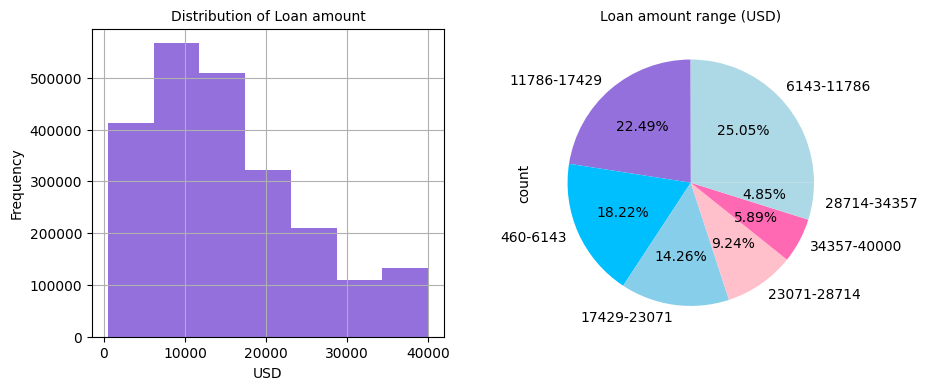

In [9]:
#creating labels for the plot 
df['loan_amnt_range'] = pd.cut(df['loan_amnt'], bins=7, 
    labels=['460-6143', '6143-11786', '11786-17429',
   '17429-23071','23071-28714','28714-34357',
   '34357-40000'])
colors = ['#ADD8E6','#9370DB','#00BFFF','#87CEEB','#FFC0CB', '#FF69B4']
#pie chart for percentage analysis
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
df['loan_amnt_range'].value_counts().plot.pie(ax=axs[1], 
autopct='%.2f%%' , fontsize=10 , colors = colors)
axs[1].set_title('Loan amount range (USD)', fontsize=10)


#histogram to study the distribution
df['loan_amnt'].hist(bins=7,ax=axs[0] , color = '#9370DB')
axs[0].set_title('Distribution of Loan amount', fontsize=10)
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("USD")
axs[0].tick_params(axis='both', labelsize=10)


**Our Observations** :
* Range of Loan amount is 460 to 40000 USD
* 25% of the borrowers apply for the loan amount between 6143-11786. So, we can see that values in this range are most common among other ranges of loan amount 
* The distribution of the skewed as less number of borrowers applied for the loan greater than 17429
 

In [10]:
#converting interest rate from object to numeric type
df['int_rate'] = df['int_rate'].astype(str).str.replace('%','')
df['int_rate'] = df['int_rate'].astype(float)
interest_rate_bins = df['int_rate'].value_counts(bins=5).sort_values(ascending=True)
interest_rate_bins

int_rate
(25.854, 30.99]                  35038
(20.718, 25.854]                128972
(15.582, 20.718]                451375
(5.2829999999999995, 10.446]    707778
(10.446, 15.582]                937505
Name: count, dtype: int64

Text(0.5, 1.0, 'Interest rate range')

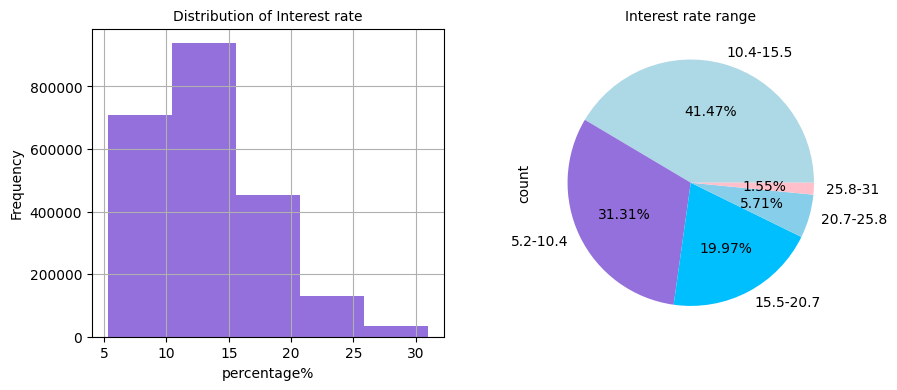

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
df['int_rate_range'] = pd.cut(df['int_rate'], 
bins=5, labels=['5.2-10.4','10.4-15.5',
'15.5-20.7','20.7-25.8','25.8-31'])

colors = ['#ADD8E6','#9370DB','#00BFFF','#87CEEB','#FFC0CB', '#FF69B4']

df['int_rate'].hist(bins=5, ax=axs[0] , color='#9370DB')
axs[0].set_title('Distribution of Interest rate', fontsize=10)
axs[0].set_ylabel("Frequency",fontsize=10)
axs[0].set_xlabel("percentage%",fontsize=10)
axs[0].tick_params(axis='both', labelsize=10)

# pie chart
df['int_rate_range'].value_counts().plot.pie(ax=axs[1], 
autopct='%.2f%%',fontsize=10 , colors=colors)
axs[1].set_title('Interest rate range', fontsize=10)

**Our Observations**
* Most common values (41.4%) of loan interest rate are in the range of 10.4% to 15.5%
* The loan amount data is right skewed,hence most applied interest rates are between 5.2% to 15.5%

In [12]:
#examining Fico_ranges (credit score ranges)
df['diff'] = df['fico_range_high'] - df['fico_range_low']
df['diff'].head(5) 

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: diff, dtype: float64

In [13]:
print("\n cheking if the difference is constant:\n",df['diff'].value_counts())


 cheking if the difference is constant:
 diff
4.0    2260227
5.0        441
Name: count, dtype: int64


It can be seen that the difference in fico ranges is almost constant , so we can take the fico average 

In [14]:
# getting average of fico scores 
df['average_fico']=(df['fico_range_high']+df['fico_range_low'])/2
df['average_fico'].sample(5)

543156     742.0
2193889    692.0
1081013    742.0
566490     672.0
1865697    702.0
Name: average_fico, dtype: float64

*The minimum credit score needed for a personal loan is typically 580, though the best loan terms are usually reserved for people with a credit score of 640 and above. There are also ways to secure a loan with a lower credit score.*
source:https://www.lendingtree.com/personal/what-credit-score-do-you-need-for-personal-loan/#:~:text=The%20minimum%20credit%20score%20needed,it%20all%20down%20for%20you.

Text(0.5, 1.0, 'FICO scores by range')

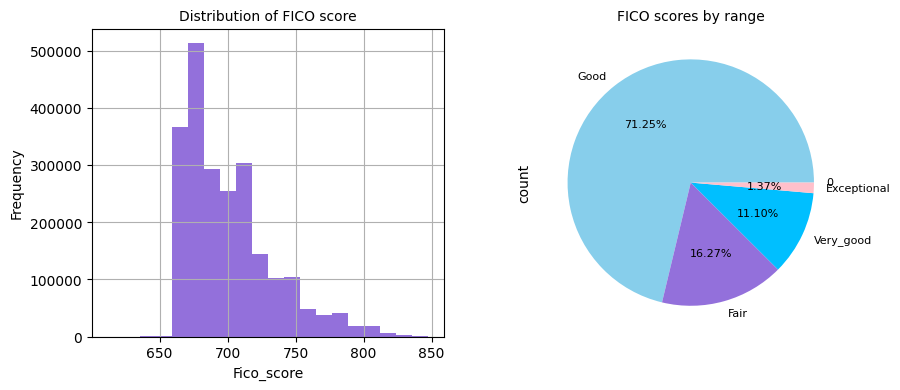

In [15]:
Ranges = [(df['average_fico']<580),
    (df['average_fico']>580) & (df['average_fico']<=669),
    (df['average_fico']>669) & (df['average_fico']<=739),
    (df['average_fico']>739) & (df['average_fico']<=799),
    (df['average_fico']>=800)]
Rating = ['Poor', 'Fair', 'Good', 'Very_good', 'Exceptional']
df['FICO_rating'] = np.select(Ranges, Rating)

#plotting histogram and pie plot
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
colors = ['#87CEEB','#9370DB','#00BFFF','#FFC0CB','#ADD8E6','#FF69B4']
# histogram
df['average_fico'].hist(bins=20, ax=axs[0] , figsize=(10, 4) , color = '#9370DB')
axs[0].set_title('Distribution of FICO score', fontsize=10)
axs[0].set_ylabel('Frequency' , fontsize=10)
axs[0].set_xlabel("Fico_score",fontsize=10)
axs[0].tick_params(axis='both', labelsize=10)

# pie chart
def autopct_generator(limit):
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct >= limit else ''
    return inner_autopct

df['FICO_rating'].value_counts().plot.pie(ax=axs[1], 
autopct=autopct_generator(1),fontsize=8 , colors=colors)
axs[1].set_title('FICO scores by range', fontsize=10)

**Our Observations**
* Poor rating is not present in the pie plot as the borrowers with poor Fico score are never accepted
* 71% of loan applicants have good Fico scores
* 675 is the most frequent Fico Score
* The applicants with Fico score greater than 800 are rare , this can be infered as the histogram is skewed


In [16]:
df.drop(columns=['fico_range_low','fico_range_high', 'diff']) 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_amnt_range,int_rate_range,average_fico,FICO_rating
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,460-6143,10.4-15.5,677.0,Good
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,23071-28714,10.4-15.5,717.0,Good
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,17429-23071,10.4-15.5,697.0,Good
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,34357-40000,10.4-15.5,787.0,Very_good
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,NaN,NaN,NaN,NaN,6143-11786,20.7-25.8,697.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,34357-40000,10.4-15.5,707.0,Good
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0,23071-28714,10.4-15.5,662.0,Fair
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,11786-17429,10.4-15.5,662.0,Fair
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


**CATEGORICAL DATA**

Text(0.5, 1.0, 'Loan term')

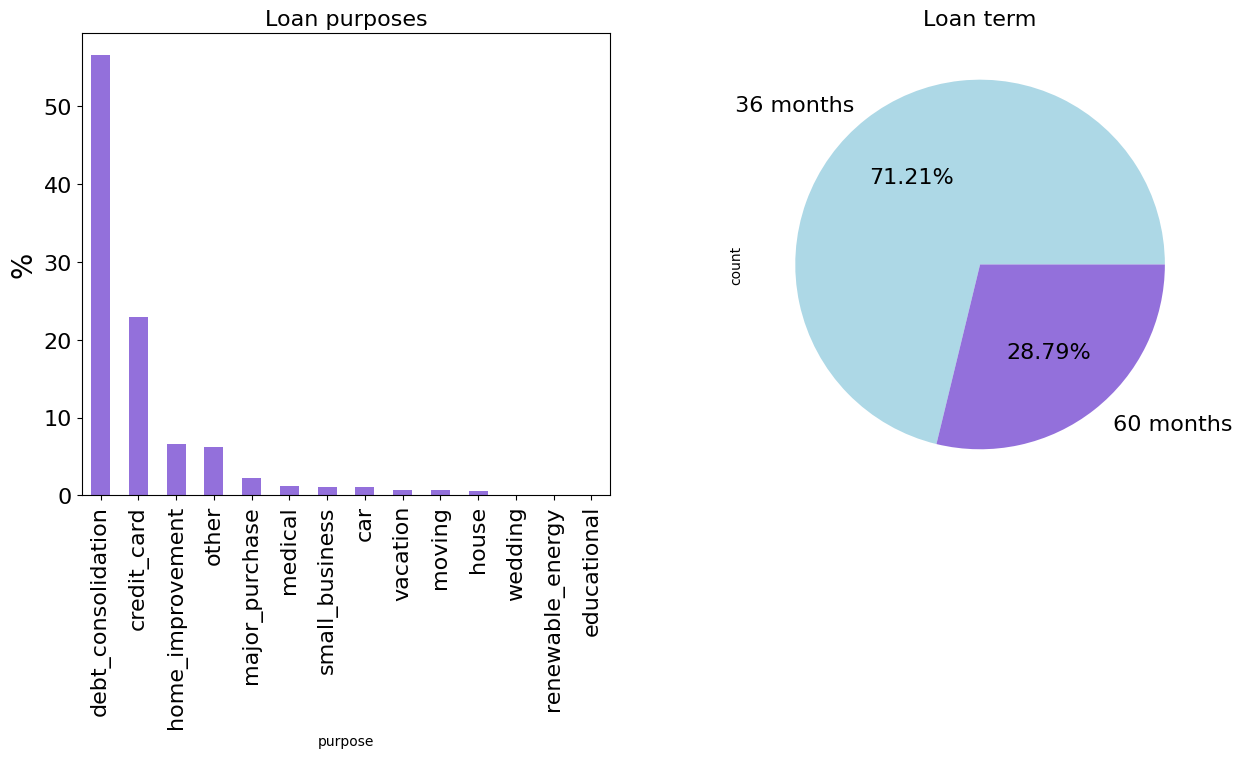

In [17]:
fig, axs = plt.subplots(1,2 , figsize=(15, 6))
# bar chart
df['purpose'].value_counts(normalize=True).mul(100).plot.bar(ax=axs[0],color='#9370DB')
axs[0].set_title('Loan purposes', fontsize=16)
axs[0].set_ylabel("%" , fontsize=20)
axs[0].tick_params(axis='both', labelsize=16)

# pie chart
colors = ['#ADD8E6','#9370DB','#FFC0CB']
df['term'].value_counts().plot.pie(ax=axs[1], 
autopct='%.2f%%' , fontsize=16 , colors=colors)
axs[1].set_title('Loan term', fontsize=16)

**Observations**
* Most people apply for the purpose of debt_consolidation and credit_Card and applications for purposes like vacation , wedding and education are negligible
* 71.2% borrowers apply for 36 months term rather than 60 month term

***loan gradings***

Loan grades are set based on both the borrower’s credit profile and the nature of the contract. 'A' grade loans represent the lowest risk while 'E' grade loans are the riskiest.
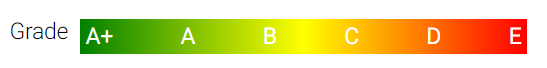

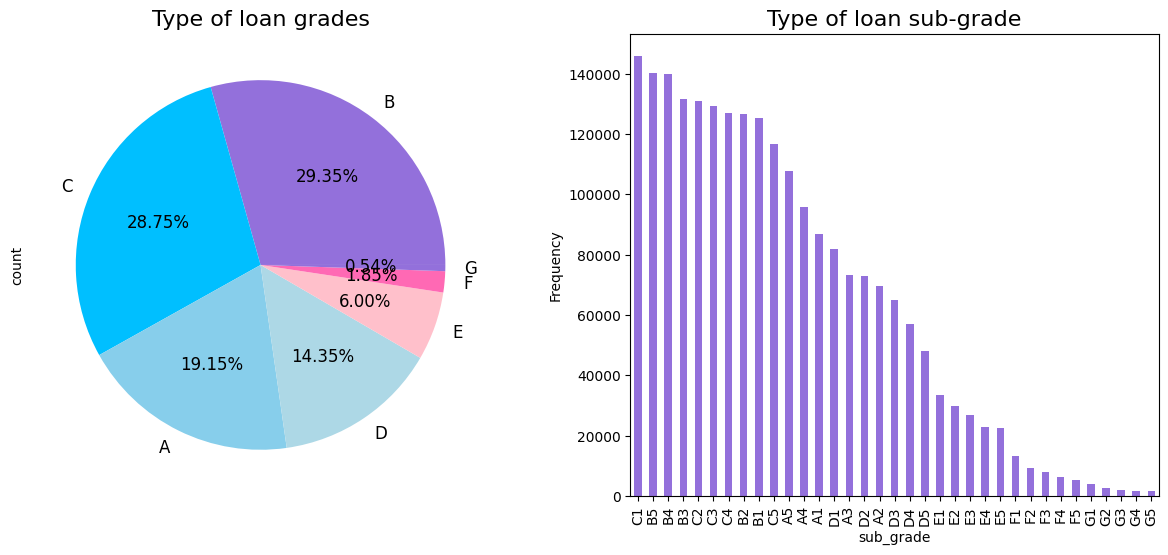

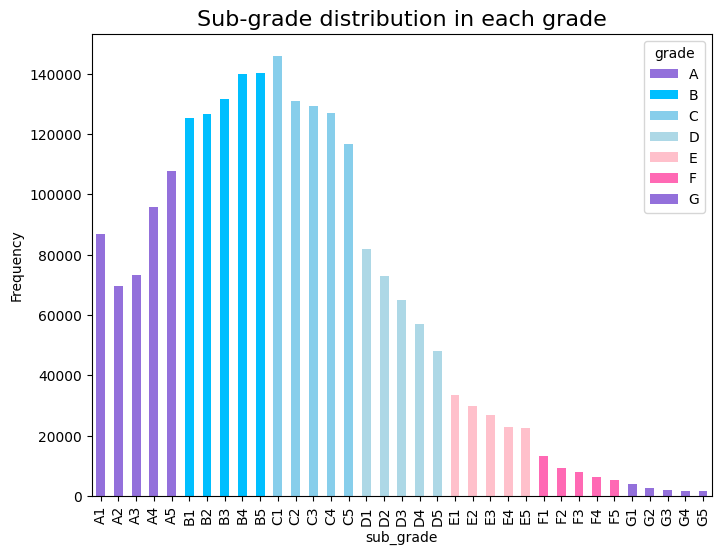

In [18]:
#grade and sub-grade
colors = ['#9370DB','#00BFFF','#87CEEB','#ADD8E6','#FFC0CB', '#FF69B4']
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
# grade
df['grade'].value_counts().plot.pie(ax=axs[0], autopct='%.2f%%' , fontsize=12 , colors=colors)
axs[0].set_title('Type of loan grades', fontsize=16)

# sub-grade
df['sub_grade'].value_counts().plot.bar(ax=axs[1] , color='#9370DB')
axs[1].set_title('Type of loan sub-grade', fontsize=16)
axs[1].set_ylabel('Frequency')
plt.show()

#### Grade vs sub_grade, using crosstab function to count the frequency
pd.crosstab(df['sub_grade'], df['grade']).plot(kind='bar', stacked=True , figsize=(8,6) , color=colors)
plt.title('Sub-grade distribution in each grade', fontsize=16)
plt.ylabel('Frequency')
plt.show()

##### **Observations**
* Majority of the loans are graded as in A,B and C with pecentages 19% 29% and 28% respectively , with C1, B4,and B5 sub-categories
* The frequency of loans in sub-categories ,in categories E,F,G, are less when compared with A,B and C categories

**Analysing Empoyee length, Verification status and Home ownership**

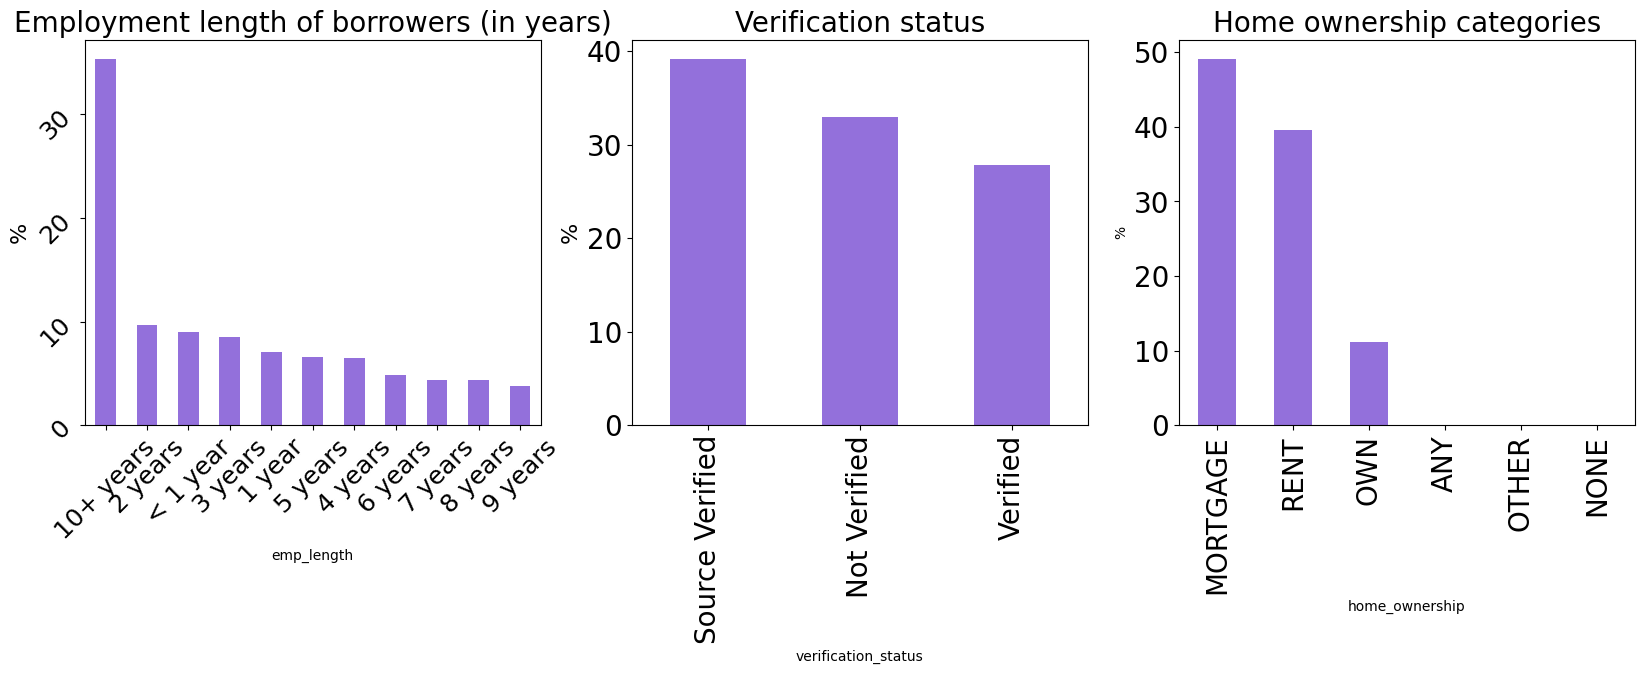

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Employment length plot
emp_length_counts = df['emp_length'].value_counts(normalize=True).mul(100)
emp_length_counts.plot.bar(ax=axs[0] , color = '#9370DB')
axs[0].set_title('Employment length of borrowers (in years)', fontsize=20)
axs[0].set_ylabel("%" , fontsize=16)
axs[0].tick_params(axis='both', labelrotation=45, labelsize=18)  # Increase x-axis label font size

# Verification status plot
verification_status_counts = df['verification_status'].value_counts(normalize=True).mul(100)
verification_status_counts.plot.bar(ax=axs[1] , color = '#9370DB')
axs[1].set_title('Verification status', fontsize=20)
axs[1].set_ylabel("%" , fontsize=16)
axs[1].tick_params(axis='both', labelsize=20)  # Increase x-axis label font size

# Home ownership plot
home_ownership_counts = df['home_ownership'].value_counts(normalize=True).mul(100)
home_ownership_counts.plot.bar(ax=axs[2] , color = '#9370DB')
axs[2].set_title('Home ownership categories', fontsize=20)
axs[2].set_ylabel("%")
axs[2].tick_params(axis='both', labelsize=20)  # Increase x-axis label font size

plt.show()

**Observations**
* About 10% of applicants are unemployed or have worked for the company for less than a year, while 35% of those who request for loans have been there for more than ten years. 
* The data doesn't have verified source of income for 35% of applicants
* Approximately 50% of the applicants have ownership of type mortage  and 40% of the applicants pay the rent.

**Initial status , loan status and Application type**

Text(0.5, 1.0, 'Application type')

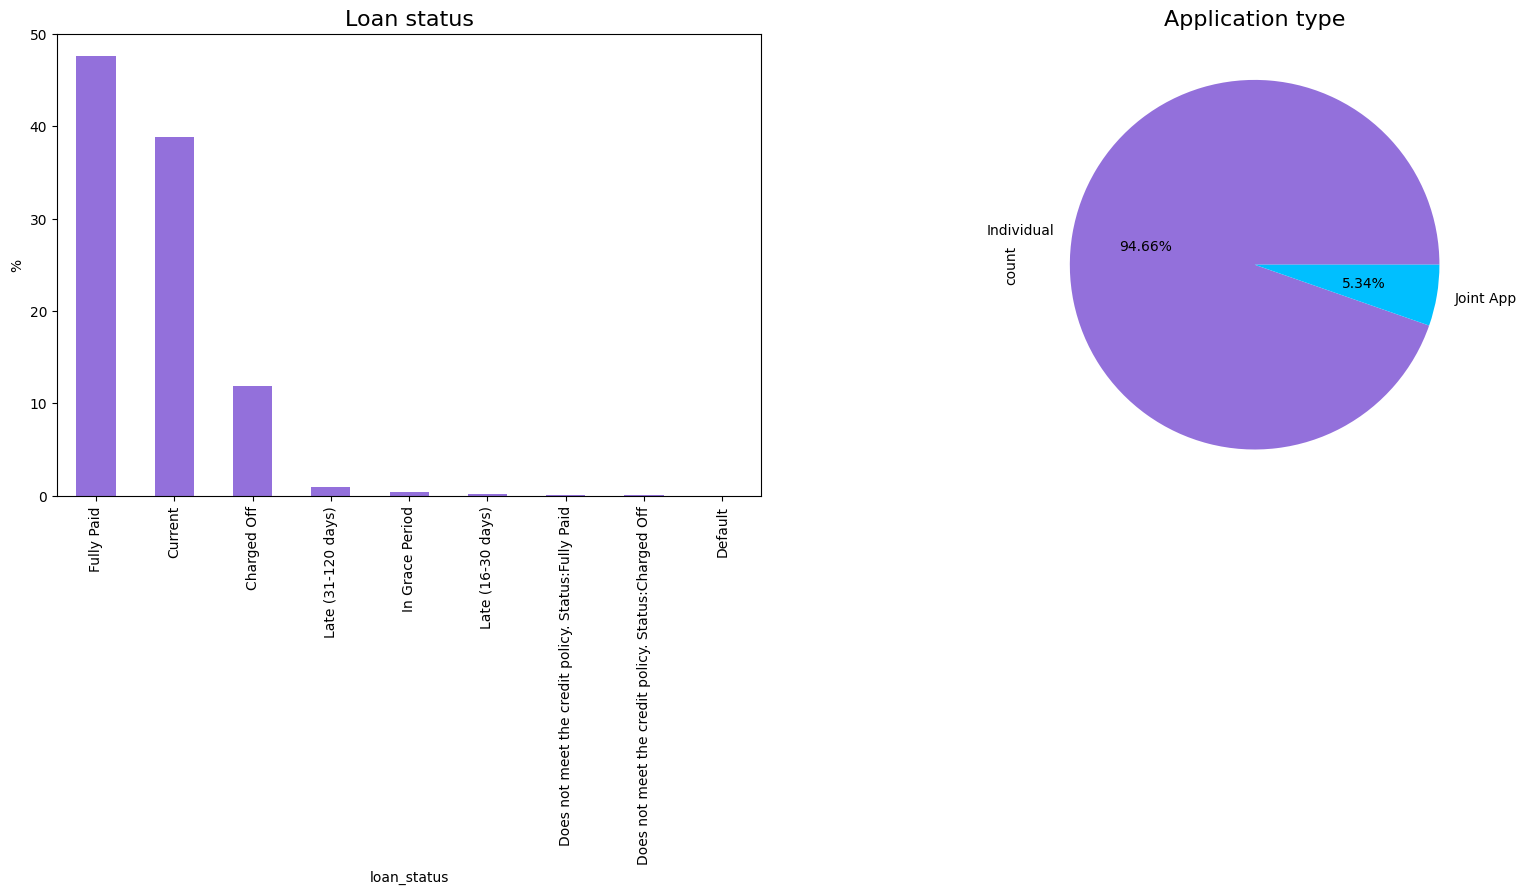

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

df['loan_status'].value_counts(normalize=True).mul(100).plot.bar(ax=axs[0] , color = '#9370DB')
axs[0].set_title('Loan status', fontsize=16)
axs[0].set_ylabel("%")

df['application_type'].value_counts().plot.pie(ax=axs[1],autopct='%.2f%%' , colors = colors)
axs[1].set_title('Application type', fontsize=16)

**Observations**
* Loan Status and labels:
    *    current: The other loans are being paid back on time.
    *    grace period:Loan is past due but within 15-day grace period
    *     Late(16-30): Loan has not been current for 16-30 days
    *     Late(31-120):Loan has not been current for 31-120 days
    *     fully paid:Loan has been fully repaid 
    *     Default: Loan has not been current for an extended   period of time.
    *     charged off: Loan for which there is no longer a reasonable expectation of further payments.
    
* from the bar chart we can observe that , there about 48% of people have fully paid the loan ,  about 40% of people have loan status as current and 30% people are charged off. 
note: we can ignore other fields

* The pie chart is about the types of applications: "individual" or "joint". Majority of the applicants, about 94%, are individuals. Only 6% are "joint" applications (two people apply for one loan and are responsible for it together)



**addr_state and emp_title**

Text(0.5, 0, 'state')

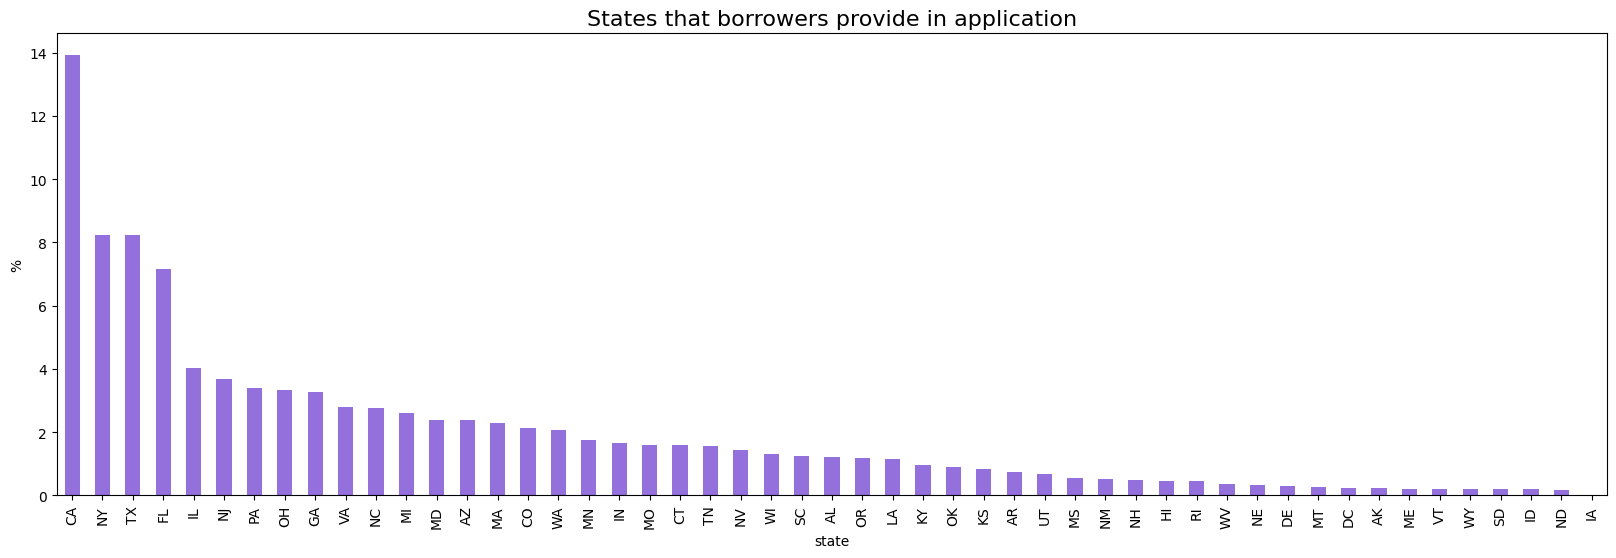

In [21]:
# count the frequency of states where the applicants live in  
df['addr_state'].value_counts(normalize=True).mul(100).plot.bar(figsize=(20, 6) , color = '#9370DB')
plt.title('States that borrowers provide in application', fontsize=16)
plt.ylabel("%")
plt.xlabel("state")

In [22]:
#proffession of the borrowers
df['emp_title'].value_counts(ascending=True)

emp_title
Current Operations Officer        1
treasury specialist 2             1
Housing Program Asst.             1
Clinical nutritionist             1
Manager, Decision Support         1
                              ...  
Driver                        14753
Registered Nurse              15867
Owner                         21977
Manager                       34298
Teacher                       38824
Name: count, Length: 512694, dtype: int64

# **BIVARIATE ANALYSIS**

**loan_status and term**

<Figure size 800x600 with 0 Axes>

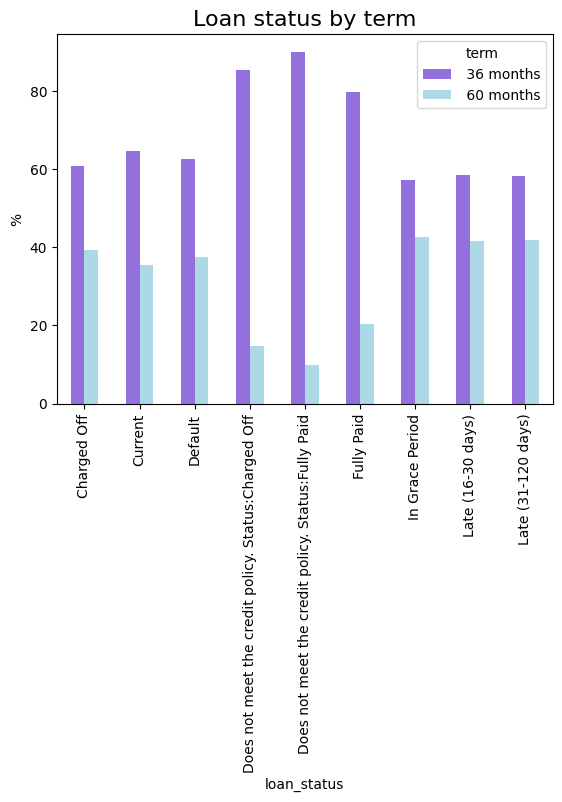

In [23]:
# create a crosstab to count the frequency of terms in each loan status
colors = ['#9370DB', '#ADD8E6','#FFC0CB']
crosstab_data = pd.crosstab(df['loan_status'], df['term'], normalize='index').mul(100)
plt.figure(figsize=(8, 6))
crosstab_data.plot(kind='bar', color=colors)
plt.title('Loan status by term', fontsize=16)
plt.ylabel('%')
plt.show()

**loan_status and grade**

<Figure size 800x600 with 0 Axes>

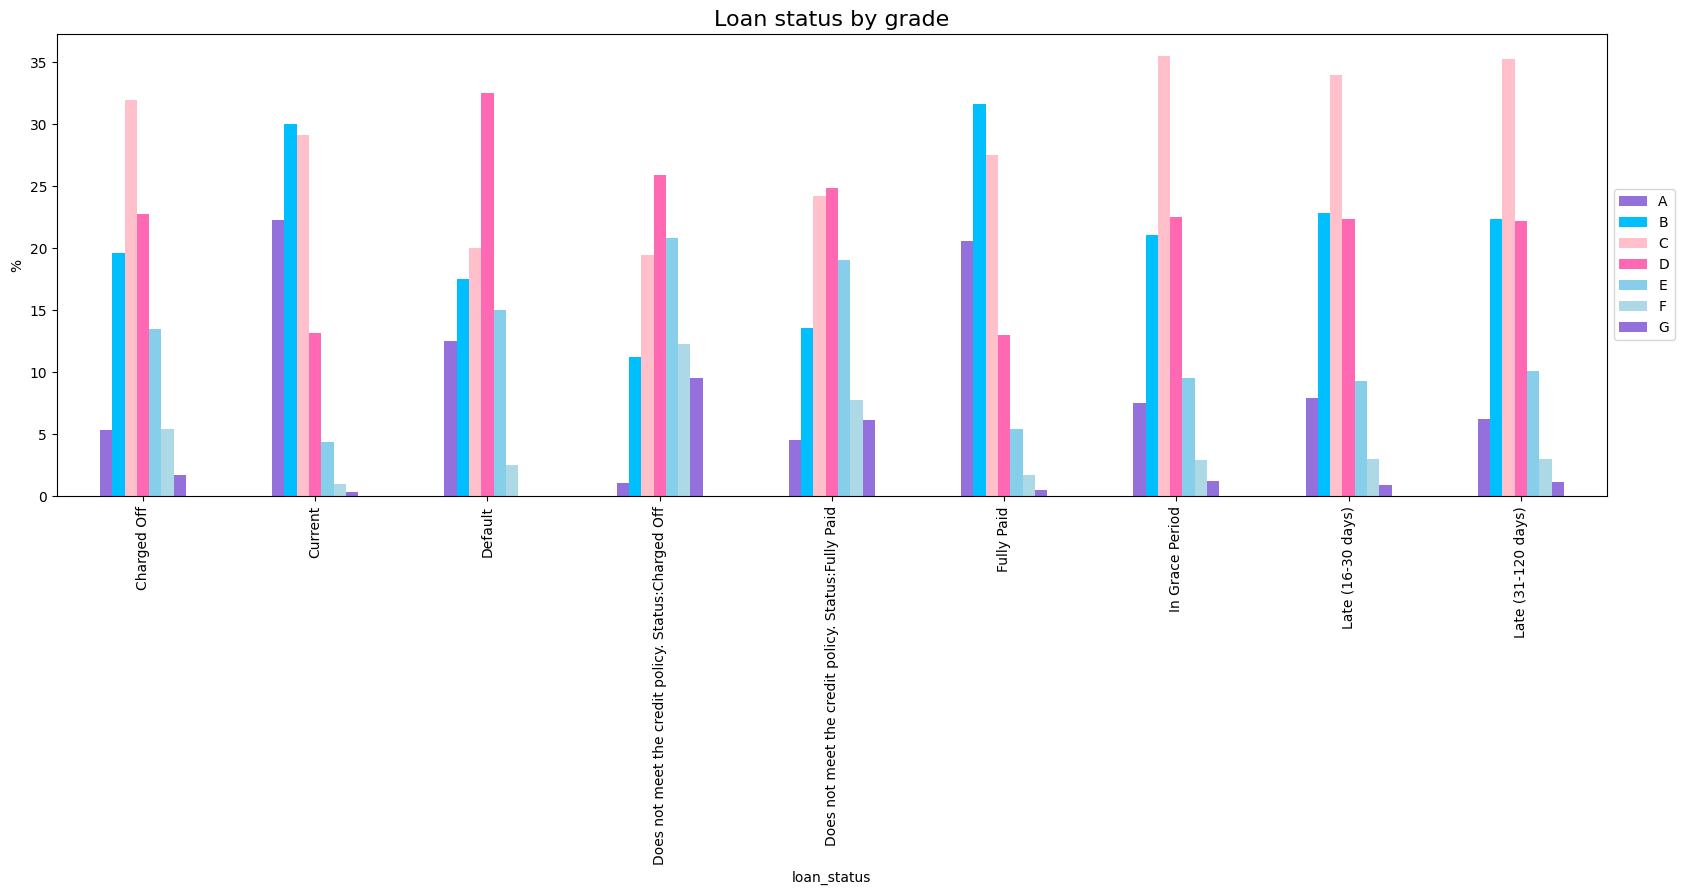

In [24]:
colors = ['#9370DB','#00BFFF','#FFC0CB', '#FF69B4','#87CEEB','#ADD8E6']
# Create a crosstab DataFrame with normalized values
crosstab_data = pd.crosstab(df['loan_status'], df['grade'], normalize='index').mul(100)

# Plot the bar chart with custom colors
plt.figure(figsize=(8, 6))
ax = crosstab_data.plot(kind='bar', stacked=False, color=colors)

# Set labels and title
plt.title('Loan status by grade', fontsize=16)
plt.ylabel('%')

# Move the legend to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.show()


**loan_status and home_ownership**

<Figure size 2000x600 with 0 Axes>

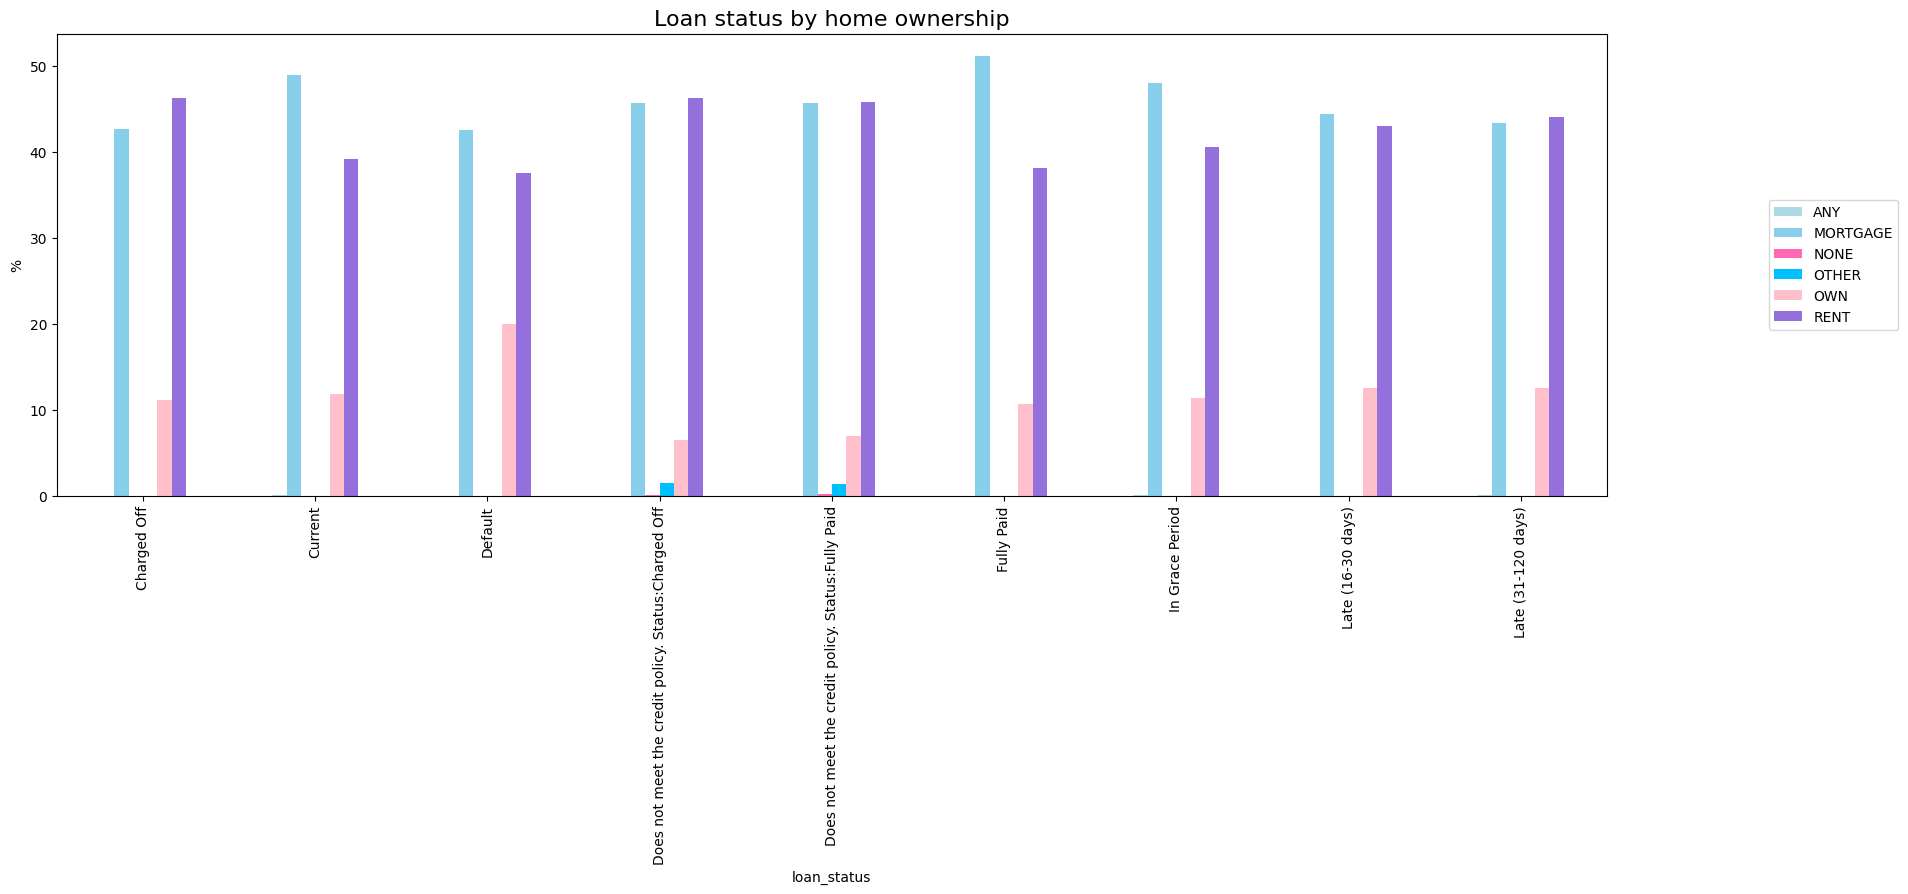

In [25]:
# Define a custom color palette
colors = ['#ADD8E6','#87CEEB','#FF69B4','#00BFFF','#FFC0CB','#9370DB']
crosstab_data = pd.crosstab(df['loan_status'], df['home_ownership'], normalize='index').mul(100)
plt.figure(figsize=(20, 6))
ax = crosstab_data.plot(kind='bar', color=colors)
plt.title('Loan status by home ownership', fontsize=16)
plt.ylabel('%')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.show()

**loan_status and verification_status**

Text(0, 0.5, '%')

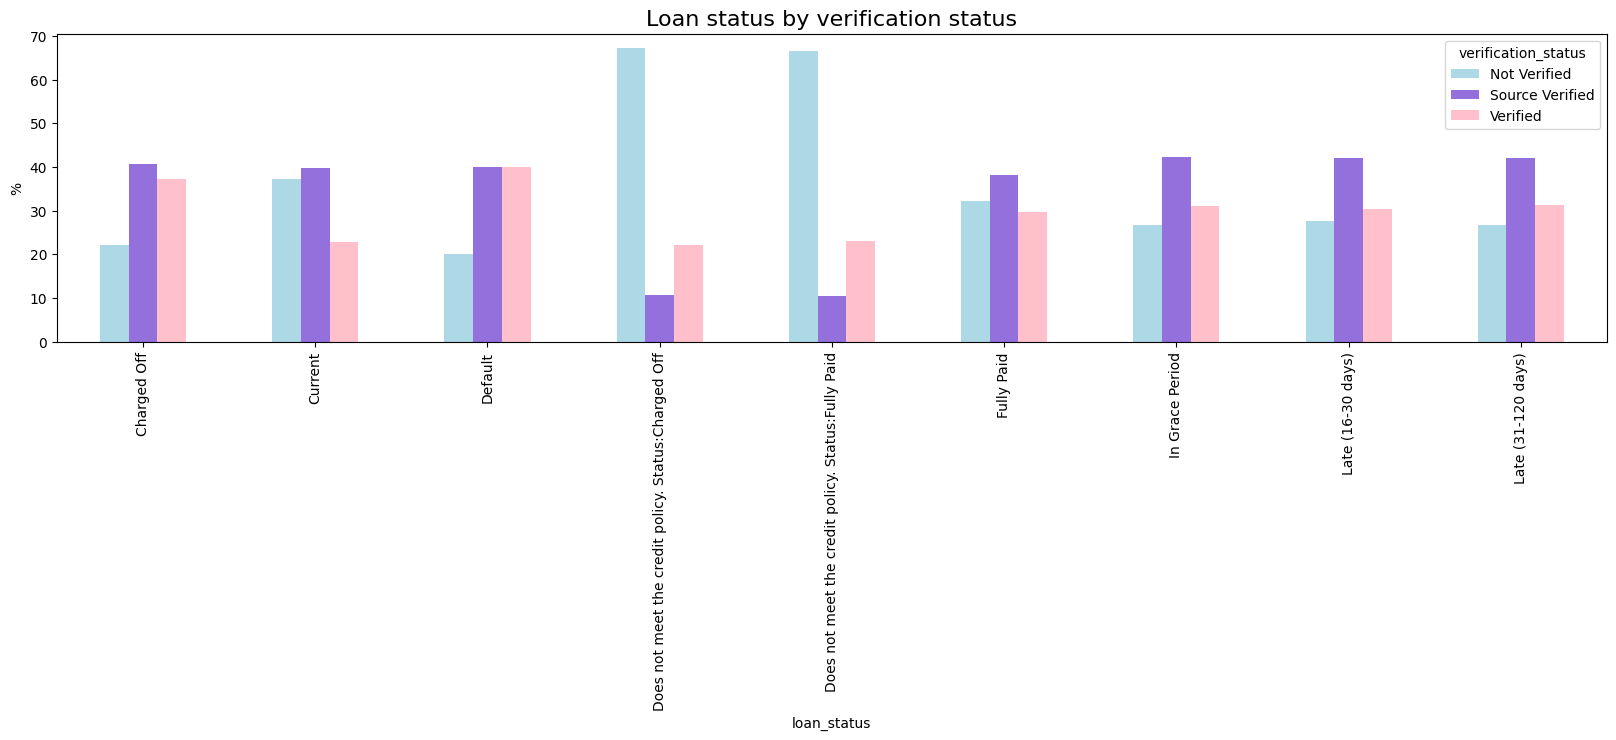

In [26]:
colors = ['#ADD8E6','#9370DB','#FFC0CB']
pd.crosstab(df['loan_status'], df['verification_status'],
normalize='index').mul(100).plot(kind='bar', figsize=(20, 4) , color=colors)
plt.title('Loan status by verification status', fontsize=16)
plt.ylabel('%')

**loan_status, emp_length, and purpose**

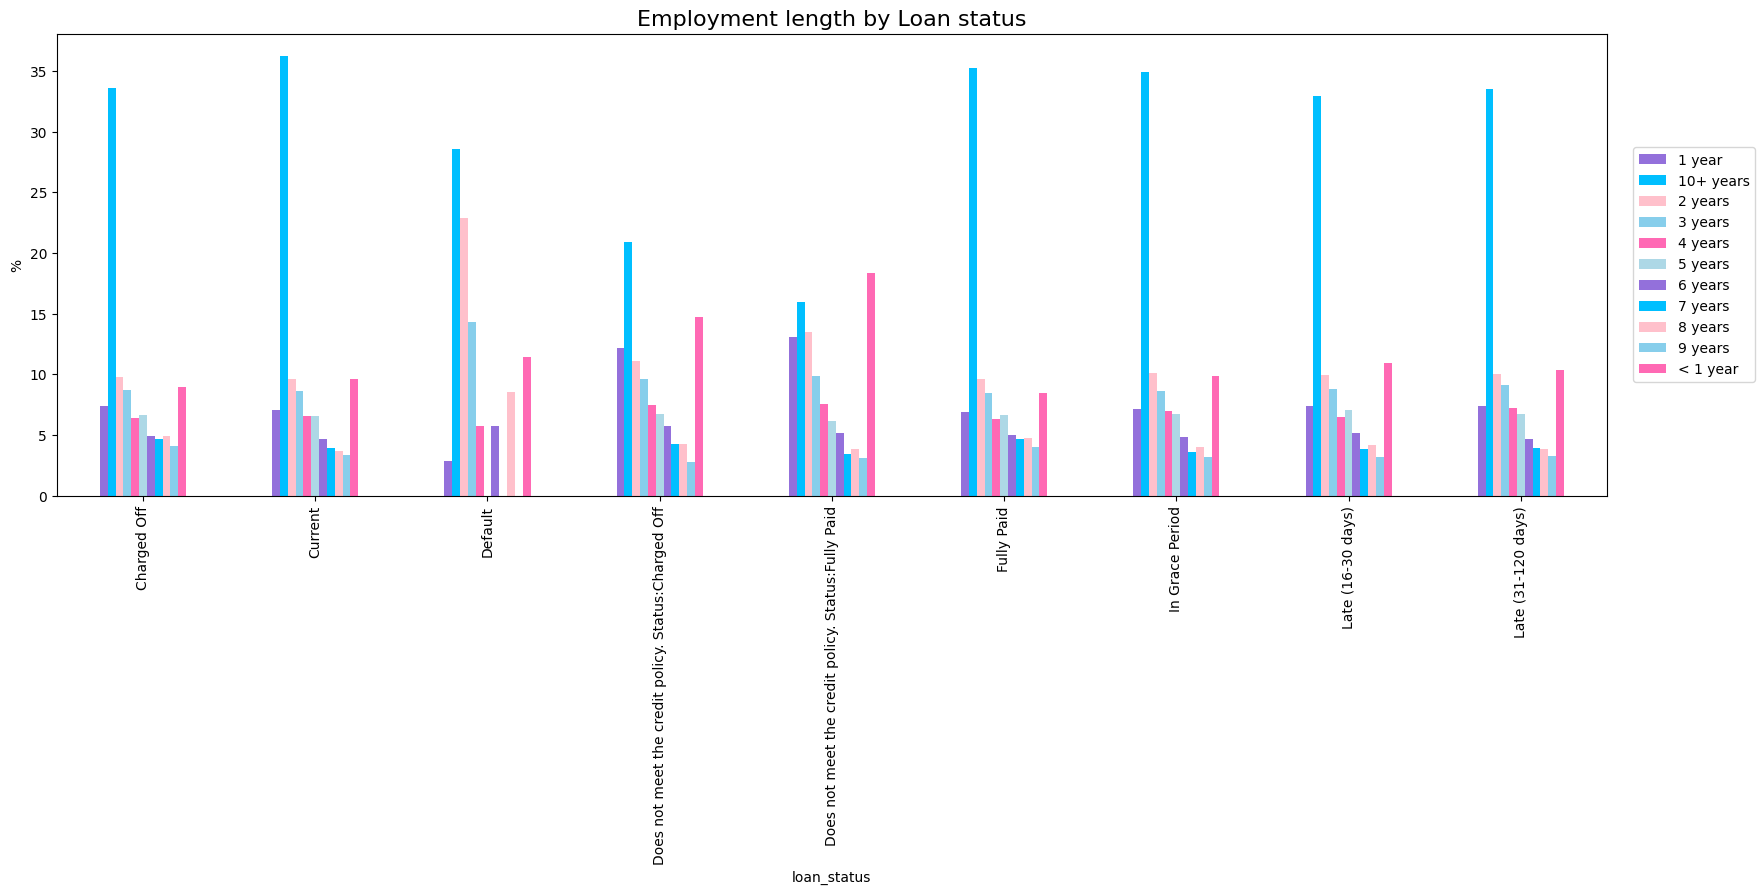

In [27]:
#loan status and employment length
colors = ['#9370DB','#00BFFF','#FFC0CB','#87CEEB','#FF69B4','#ADD8E6']
pd.crosstab(df['loan_status'], df['emp_length'], 
    normalize='index').mul(100).plot(kind='bar' , color = colors)
plt.title('Employment length by Loan status', fontsize=16)
plt.ylabel("%")
plt.legend(bbox_to_anchor=(1.1, 0.5), loc='right')
fig = plt.gcf()
fig.set_size_inches(20, 6)

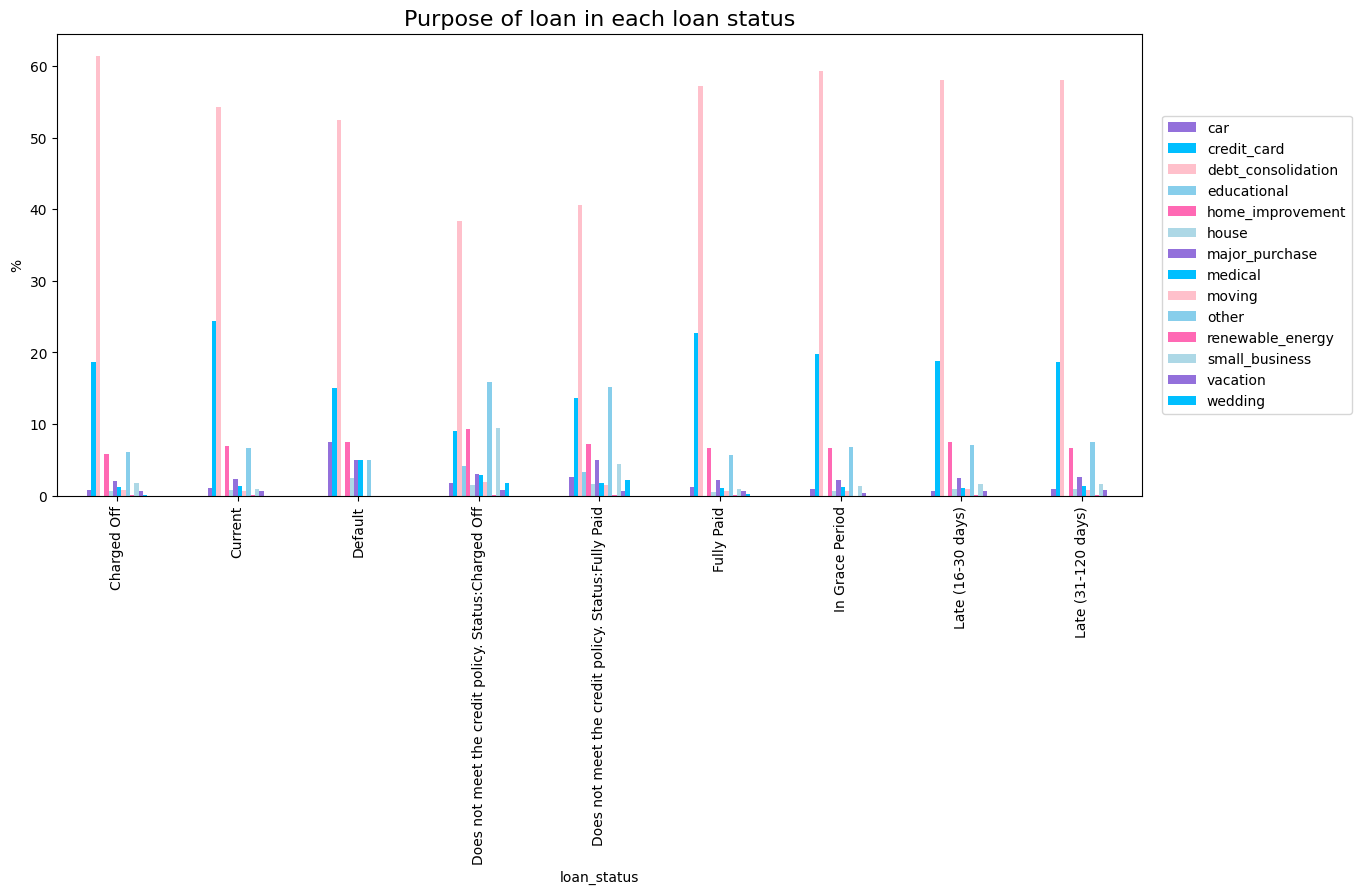

In [28]:
# loan status and purposes
colors = ['#9370DB','#00BFFF','#FFC0CB','#87CEEB','#FF69B4','#ADD8E6']
pd.crosstab(df['loan_status'], df['purpose'], 
normalize='index').mul(100).plot(kind='bar' , color = colors)
plt.title('Purpose of loan in each loan status', fontsize=16)
plt.ylabel("%")
fig = plt.gcf()
fig.set_size_inches(14, 6)
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='right')

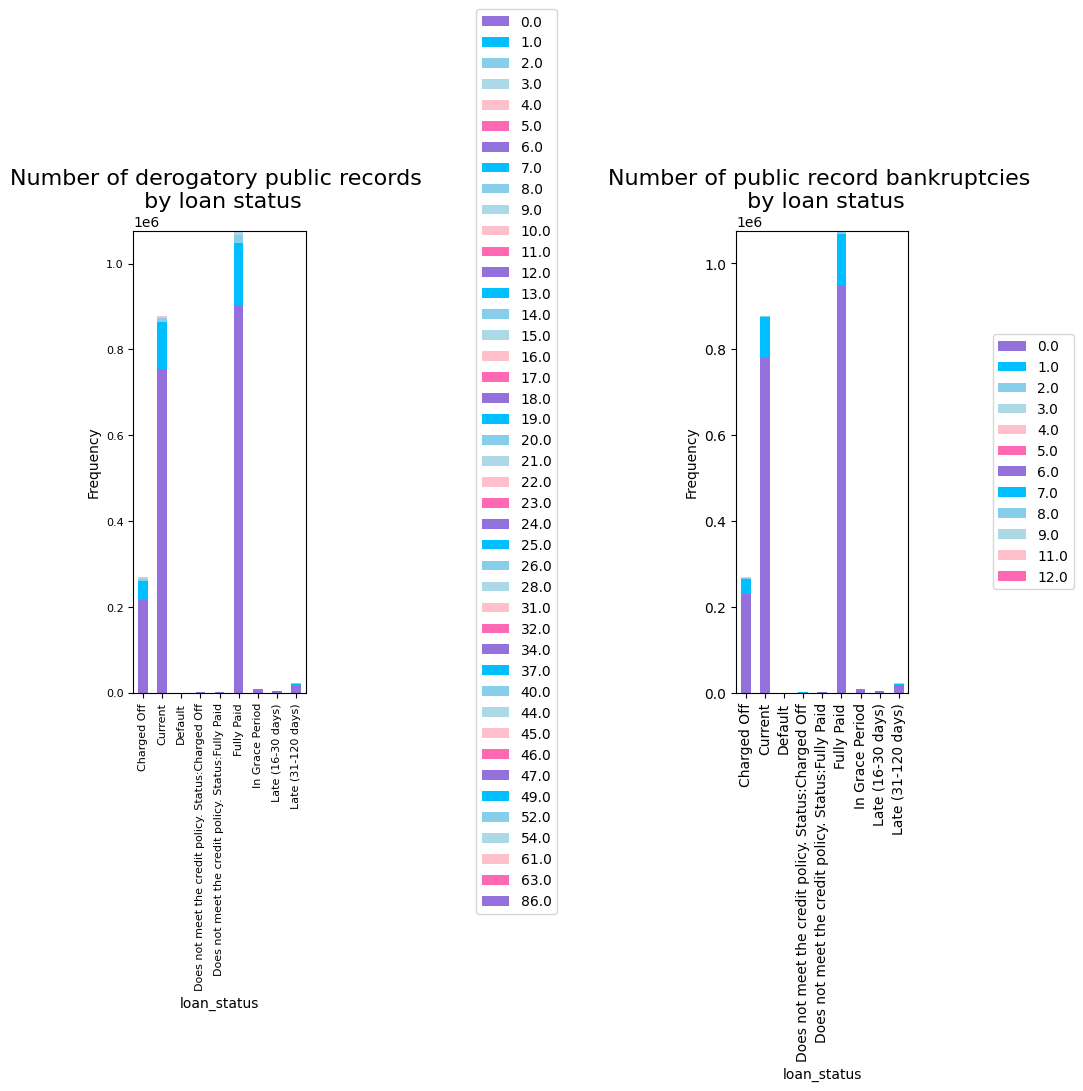

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))
plt.subplots_adjust(wspace=2.5)

colors = ['#9370DB','#00BFFF','#87CEEB','#ADD8E6','#FFC0CB', '#FF69B4']
# loan status and number of derogatory public records
pd.crosstab(df['loan_status'], df['pub_rec']).plot(kind='bar',ax=axs[0], stacked=True , color = colors , fontsize=8)
axs[0].set_title('Number of derogatory public records \n by loan status', fontsize=16)
axs[0].set_ylabel("Frequency")
axs[0].legend(bbox_to_anchor=(2.5, 0.5), loc='right')

# loan status and number of public record bankruptcies
pd.crosstab(df['loan_status'], df['pub_rec_bankruptcies']).plot(kind='bar',ax=axs[1], stacked=True , color = colors)
axs[1].set_title('Number of public record bankruptcies \n by loan status', fontsize=16)
axs[1].set_ylabel("Frequency")
axs[1].legend(bbox_to_anchor=(2, 0.5), loc='right')

**Loan status and interest rate / loan amount**

Text(0, 0.5, 'loan_amnt')

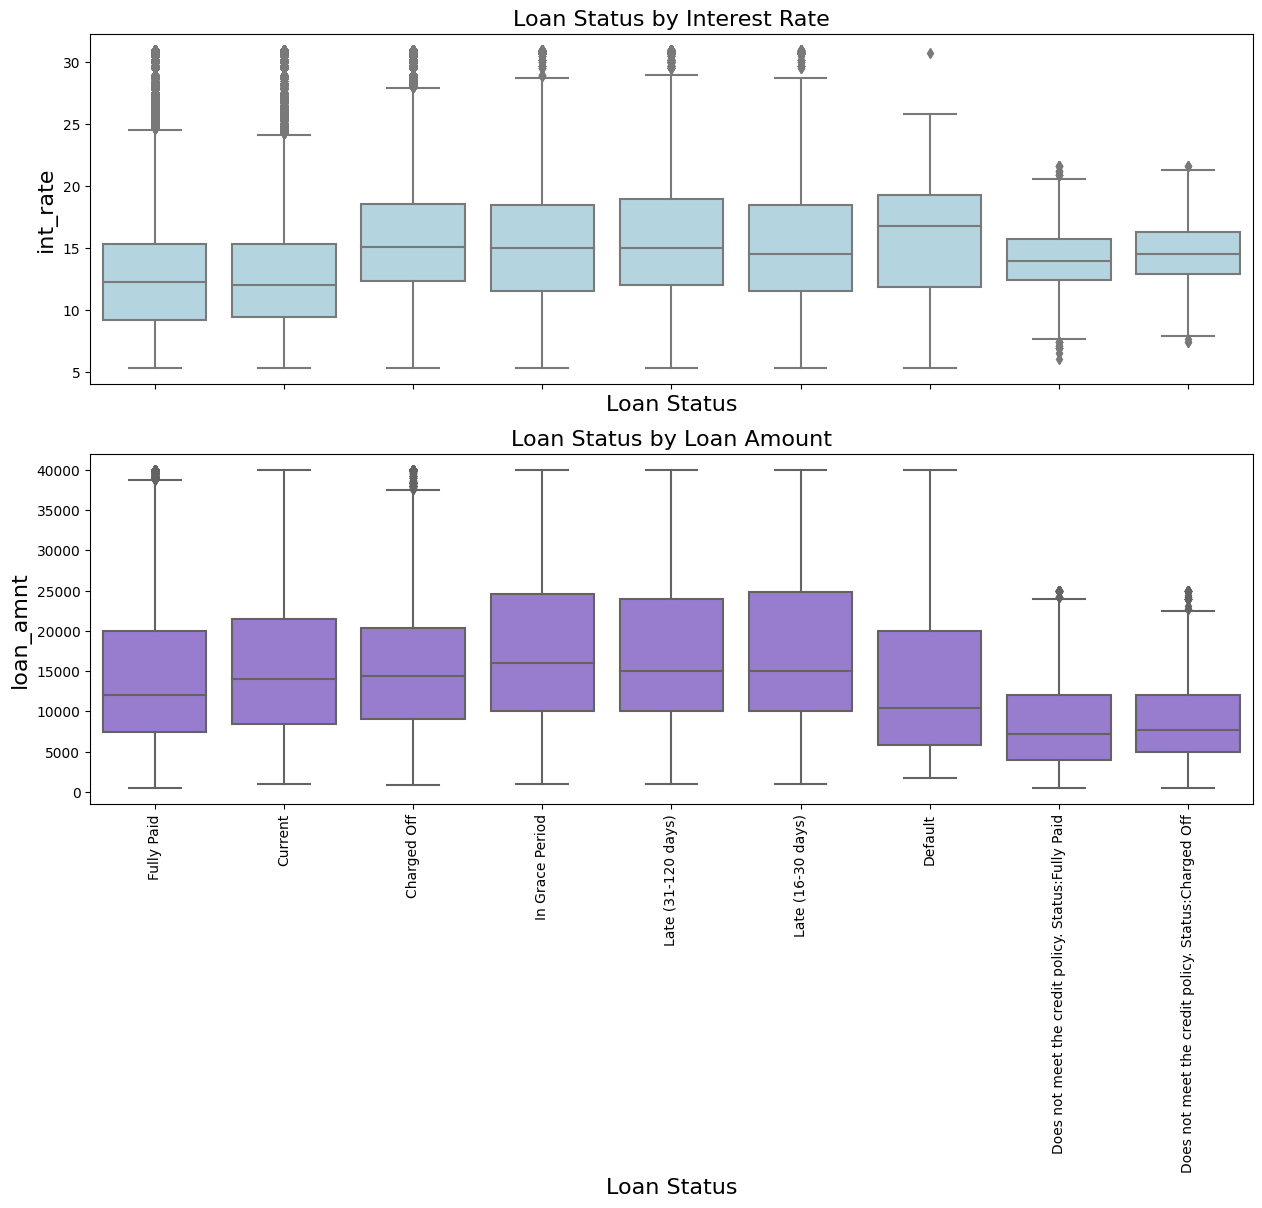

In [30]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# loan status and interest rate
sns.boxplot(x="loan_status", y="int_rate", data=df, color='#ADD8E6', ax=axs[0])
axs[0].set_title('Loan Status by Interest Rate', fontsize=16)
axs[0].set_xlabel("Loan Status", fontsize=16)  
axs[0].set_ylabel("int_rate", fontsize=16)

# loan status and loan amount
sns.boxplot(x="loan_status", y="loan_amnt", 
data=df, color='#9370DB', ax=axs[1])
axs[1].set_title('Loan Status by Loan Amount', fontsize=16)
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_xlabel("Loan Status", fontsize=16)  
axs[1].set_ylabel("loan_amnt", fontsize=16)

**Loan amount and years of experience**

In [31]:
df_emp = pd.crosstab(df['loan_amnt_range'], df['emp_length'], normalize='index').mul(100)
df_emp

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
loan_amnt_range,,,,,,,,,,,
460-6143,8.310185,31.103765,10.820514,9.291899,6.969466,6.811352,4.862273,4.197870,4.067642,3.472820,10.092215
6143-11786,7.740606,31.834259,10.487081,9.241655,6.894198,6.988265,5.018603,4.439864,4.347519,3.677581,9.330369
11786-17429,6.880211,35.086492,9.586571,8.623167,6.532286,6.682408,4.921337,4.588403,4.511573,3.960639,8.626915
17429-23071,6.289481,38.650780,8.717607,7.926523,6.021975,6.400533,4.868991,4.519829,4.500885,3.899896,8.203500
23071-28714,5.826886,41.028433,8.339535,7.496991,5.789429,6.149021,4.685682,4.286135,4.425477,3.882593,8.089818
28714-34357,5.649124,41.383358,8.448597,7.407197,5.702141,6.040122,4.668314,4.062408,4.251754,3.774603,8.612381
34357-40000,5.646842,41.764473,8.139075,7.420147,5.716566,5.893199,4.310472,4.043972,4.145459,3.571401,9.348394


**observations** 
* The table indicates that 41% of the people who apply for high loan amount (34357-40000) have 10+ years of experience where as people who have 1 to 9 years of experience are less than 10% 

**Loan amount and term**

Text(0.5, 1.0, 'Loan amount distribution by term')

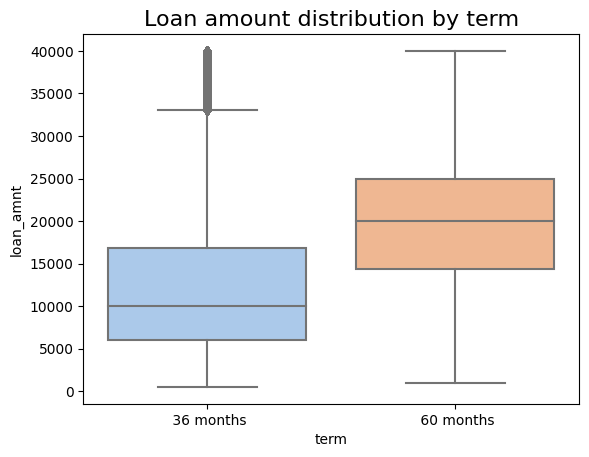

In [32]:
sns.boxplot(x='term', y='loan_amnt', data=df, palette="pastel")
plt.title('Loan amount distribution by term', fontsize=16)

**observation**
* The average loan amount (about 20K USD) on 60 months term is higher than the average loan amount (about 10K) of 36 months term. 
* It is obvious as higher the loan amount longer will be the time to payback 

**Loan amount vs Purpose**

Text(0, 0.5, '%')

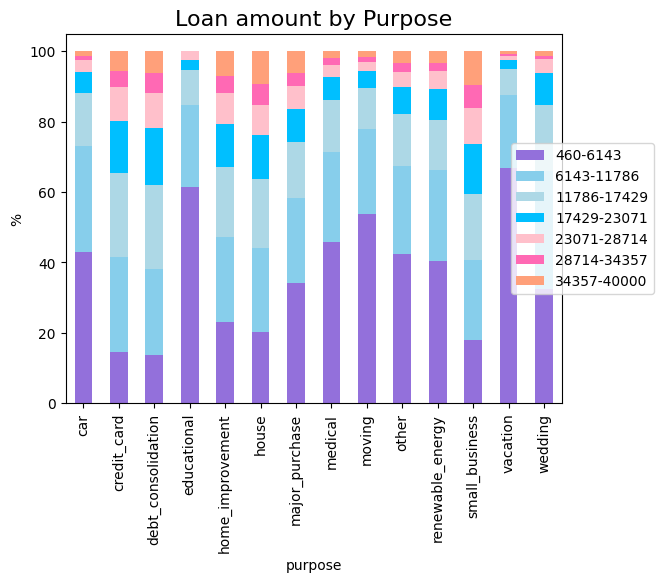

In [33]:
colors = ['#9370DB','#87CEEB','#ADD8E6','#00BFFF','#FFC0CB', '#FF69B4','#FFA07A']
pd.crosstab(df['purpose'], df['loan_amnt_range'], 
normalize='index').mul(100).plot(kind='bar', stacked=True , color = colors)
plt.title('Loan amount by Purpose', fontsize=16)
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='right')
plt.ylabel('%')

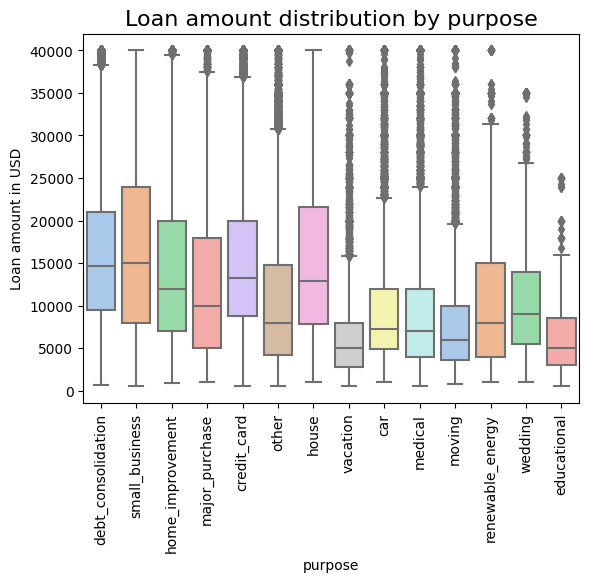

In [34]:
sns.boxplot(x='purpose', y='loan_amnt', data=df, palette= 'pastel')
plt.title("Loan amount distribution by purpose", fontsize=16)
plt.ylabel('Loan amount in USD')
plt.tick_params(axis='x', rotation=90)

**bar plot**
* Loan amount for education ,car ,medical ,moving,vacation is in the range of 460 - 6143 USD 
* The loan amount for wedding , credit card , debt , small businesses is in the range 6143 - 11786 USD. Higher Loan amount is required for these activities.

**boxplot**
* Highest average loan amount (about 15k) is required for small businesses and lowest Loan amount (5k USD) is for vacation 

**Interest Rate and term**

Text(0, 0.5, '%')

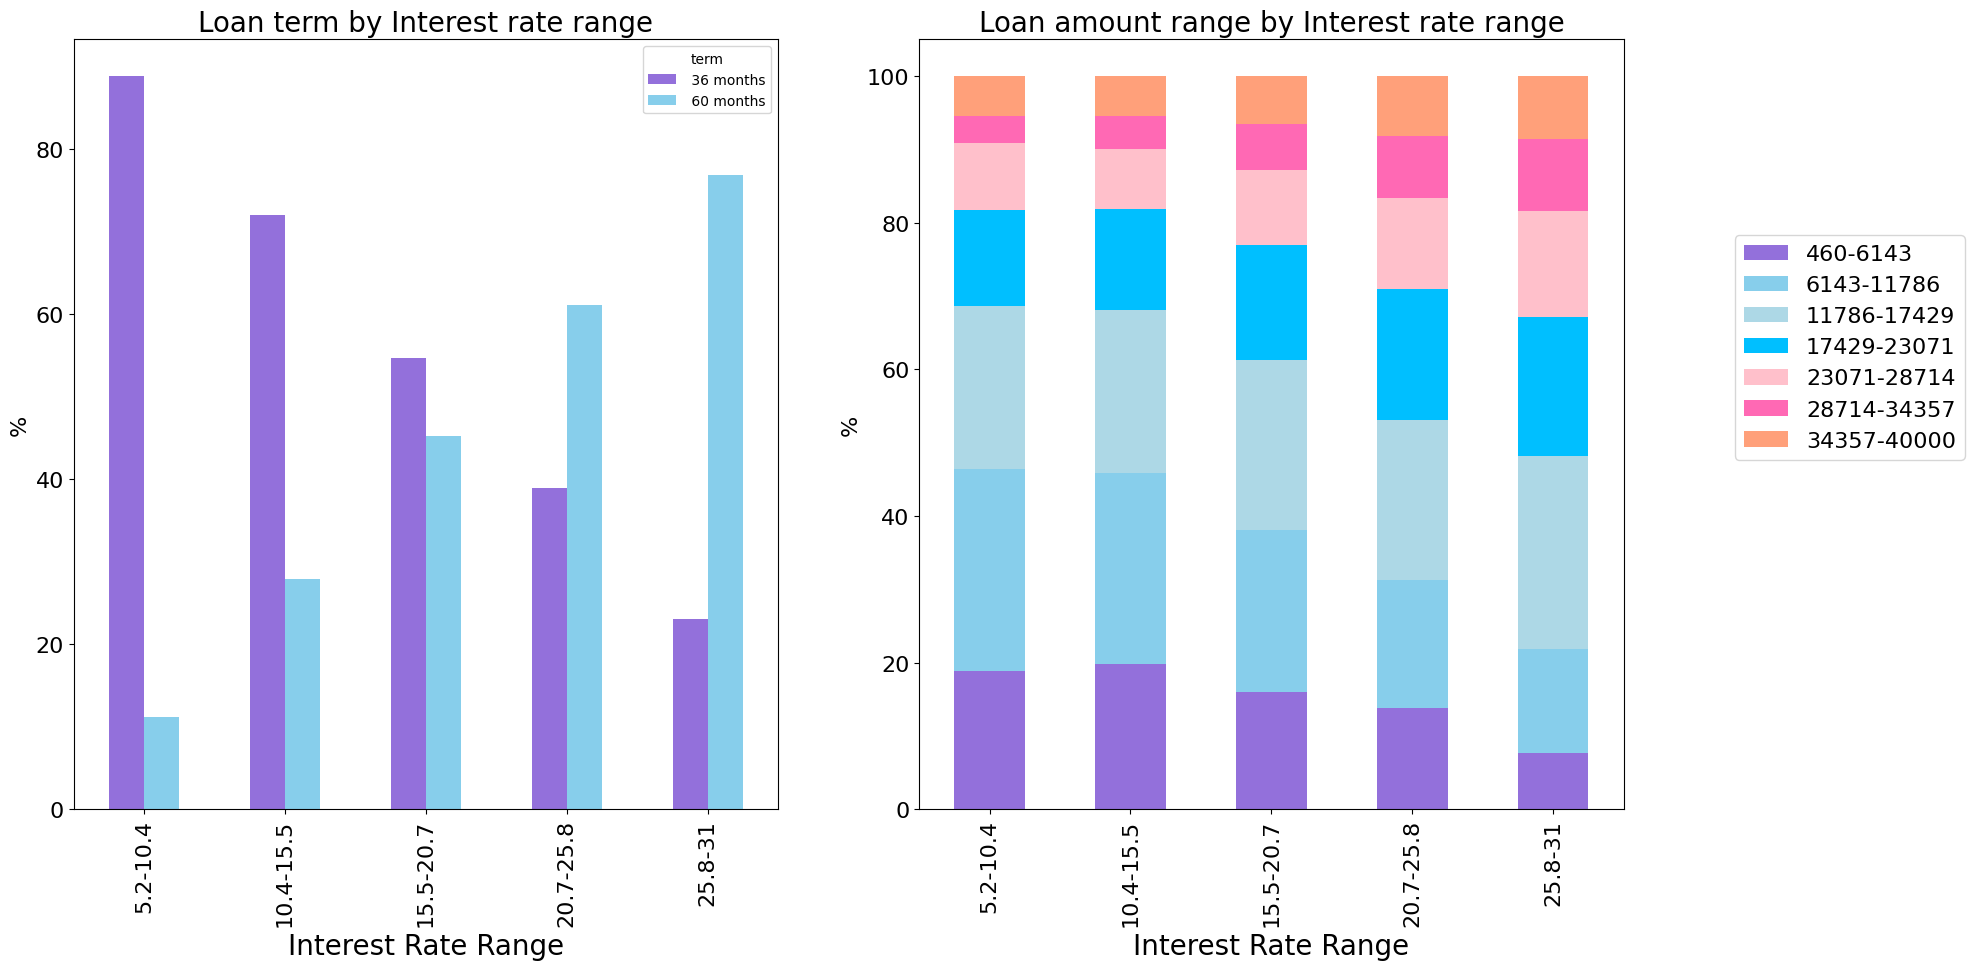

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
# plot
pd.crosstab(df['int_rate_range'], df['term'], 
normalize='index').mul(100).plot(kind='bar', ax=axs[0], 
stacked=False , color = colors , fontsize = 16)
pd.crosstab(df['int_rate_range'], df['loan_amnt_range'],
normalize='index').mul(100).plot(kind='bar', ax=axs[1],
stacked=True , color = colors , fontsize = 16)

# set titles
axs[0].set_title('Loan term by Interest rate range',fontsize=20)
axs[1].set_title('Loan amount range by Interest rate range', fontsize=20)
axs[1].legend(bbox_to_anchor=(1.5, 0.6), loc='right' , fontsize = 16)
axs[0].set_xlabel("Interest Rate Range", fontsize=20)  
axs[0].set_ylabel("%", fontsize=16)
axs[1].set_xlabel("Interest Rate Range", fontsize=20)  
axs[1].set_ylabel("%", fontsize=16)

* first graph ,It can be seen that for higher interest rates ranging (25%-31%) , the term is of 60 months and for lower interest rates the term is of 36 months 

**interest rate and grade**

Text(0.5, 1.0, 'Interest rate distribution by Grade')

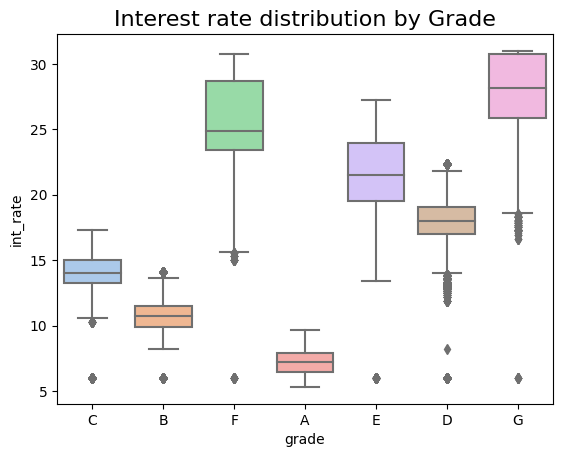

In [36]:
sns.boxplot(x='grade', y='int_rate', data=df, palette='pastel')
plt.title("Interest rate distribution by Grade", fontsize=16)

**Observations**
* Higher interest rates belong to grades E,F and G with respective average interest rates as 22% , 25% and 28%. These grades show higher level of risk than others.
* Grades with lower interest rates are A < B < C

# **CLEANING THE DATA**

### Selected Features for Credit Risk Analysis ☑️
In our credit risk analysis, we've meticulously chosen a subset of features from the LendingClub dataset based on their relevance and definitions from the LC dictionary. These features offer valuable insights into borrowers, loan characteristics, and financial history. To maintain the integrity of our analysis and prevent data leakage, we've focused on features that are available at the time of loan origination. This approach aligns with the fact that lenders wouldn't have access to certain details until after the loan is issued, ensuring our assessments remain accurate and secure.
We will further analyze these features to determine whether they should be retained in our analysis.

Here is the list of selected features along with their definitions:

| Feature Name             | Definition                                                                                        |
|--------------------------|--------------------------------------------------------------------------------------------------|
| `loan_amnt`              | The listed amount of the loan applied for by the borrower.                                       |
| `term`                   | The number of payments on the loan in months (either 36 or 60).                                   |
| `int_rate`               | The interest rate on the loan.                                                                    |
| `installment`            | The monthly payment owed by the borrower if the loan originates.                                 |
| `grade`                  | LendingClub assigned loan grade.                                                                  |
| `sub_grade`              | LendingClub assigned loan subgrade.                                                              |
| `emp_title`              | The job title supplied by the borrower when applying for the loan.                                |
| `emp_length`             | Employment length in years, ranging from 0 (less than one year) to 10 (ten or more years).        |
| `home_ownership`         | The home ownership status provided by the borrower (e.g., RENT, OWN, MORTGAGE, OTHER).           |
| `annual_inc`             | The self-reported annual income provided by the borrower during registration.                     |
| `verification_status`    | Indicates if income was verified by LendingClub or not, or if the income source was verified.    |
| `issue_d`                | The month in which the loan was funded.                                                           |
| `loan_status`            | The current status of the loan (e.g., Fully Paid, Charged Off).                                     |
| `purpose`                | A category provided by the borrower for the loan request.                                         |
| `title`                  | The loan title provided by the borrower.                                                           |
| `zip_code`               | The first 3 numbers of the zip code provided by the borrower in the loan application.             |
| `addr_state`             | The state provided by the borrower in the loan application.                                       |
| `dti`                    | A ratio calculated using the borrower’s total monthly debt payments divided by their monthly income, excluding mortgage and the requested LC loan. |
| `earliest_cr_line`       | The month when the borrower's earliest reported credit line was opened.                            |
| `open_acc`               | The number of open credit lines in the borrower's credit file.                                      |
| `pub_rec`                | Number of derogatory public records.                                                                |
| `revol_bal`              | Total credit revolving balance.                                                                    |
| `revol_util`             | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. |
| `total_acc`              | The total number of credit lines currently in the borrower's credit file.                             |
| `initial_list_status`    | The initial listing status of the loan (possible values: 'W' for whole loans or 'F' for fractional loans). |
| `application_type`       | Indicates whether the loan is an individual application or a joint application with two co-borrowers.  |
| `mort_acc`               | Number of mortgage accounts.                                                                        |
| `pub_rec_bankruptcies`   | Number of public record bankruptcies.                                                               |
| `fico_range_high`        | The upper boundary range the borrower’s FICO at loan origination belongs to.                       |
| `fico_range_low`         | The lower boundary range the borrower’s FICO at loan origination belongs to.                      |

These carefully selected features provide a solid foundation for evaluating credit risk and making informed decisions in the loan origination process.



In [37]:
selected_columns = [
    'loan_amnt', 'term', 'int_rate', 'sub_grade',
    'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
    'loan_status', 'purpose', 'addr_state', 'dti',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    'application_type', 'mort_acc','average_fico']

# Select the specified columns from the DataFrame
newdf = df[selected_columns]

In [38]:
newdf.dtypes.sort_values()

loan_amnt              float64
total_acc              float64
revol_util             float64
revol_bal              float64
pub_rec                float64
open_acc               float64
dti                    float64
mort_acc               float64
average_fico           float64
annual_inc             float64
int_rate               float64
verification_status     object
addr_state              object
home_ownership          object
emp_length              object
sub_grade               object
term                    object
application_type        object
loan_status             object
purpose                 object
dtype: object

## HANDLING MISSING DATA

In [39]:
newdf.isnull().mean()*100

loan_amnt              0.001460
term                   0.001460
int_rate               0.001460
sub_grade              0.001460
emp_length             6.499754
home_ownership         0.001460
annual_inc             0.001637
verification_status    0.001460
loan_status            0.001460
purpose                0.001460
addr_state             0.001460
dti                    0.077144
open_acc               0.002743
pub_rec                0.002743
revol_bal              0.001460
revol_util             0.081170
total_acc              0.002743
application_type       0.001460
mort_acc               2.214490
average_fico           0.001460
dtype: float64

In [40]:
# Removing the rows with less than 6% of missing data from each column
cols = [var for var in newdf.columns if newdf[var].isnull().mean() < 0.06 and newdf[var].isnull().mean() > 0]
print(cols)
#finding percentage of rows left if we remove these rows 
print("percentage of rows left:",len(newdf[cols].dropna())/len(newdf))

['loan_amnt', 'term', 'int_rate', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type', 'mort_acc', 'average_fico']
percentage of rows left: 0.9763480442570689


In [41]:
# 97% data is left hence we can remove these rows 
nf = newdf.dropna(subset=cols)
print(newdf.shape , nf.shape)

(2260701, 20) (2207231, 20)


In [42]:
#checking for missing values again
nf.isnull().mean()*100

loan_amnt              0.000000
term                   0.000000
int_rate               0.000000
sub_grade              0.000000
emp_length             6.514633
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
open_acc               0.000000
pub_rec                0.000000
revol_bal              0.000000
revol_util             0.000000
total_acc              0.000000
application_type       0.000000
mort_acc               0.000000
average_fico           0.000000
dtype: float64

In [43]:
col = ['emp_length']
print("percentage of rows left:",len(nf[col].dropna())/len(nf))
nf = nf.dropna(subset=col)

percentage of rows left: 0.9348536695977901


In [44]:
print(nf['emp_length'].isnull().sum())
print(nf.shape)

0
(2063438, 20)


## **OUTLIER ANALYSIS**

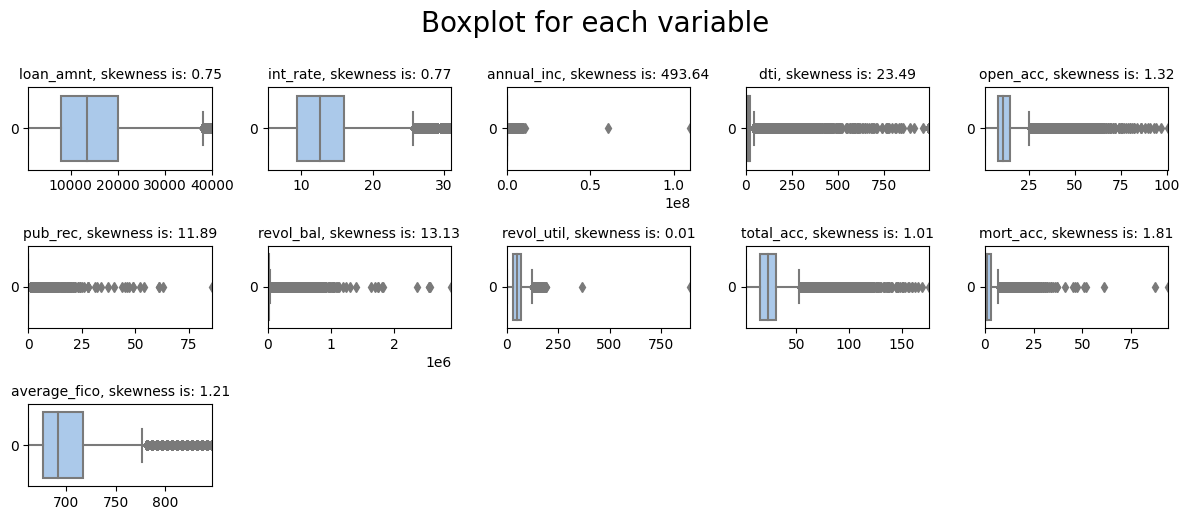

In [79]:
def boxplots_visual(data, column):
    num_features = len(column)
    num_rows = (num_features - 1)
    num_cols = min(num_features, 5)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 16))
    fig.suptitle('Boxplot for each variable', y=1, size=20)
    axes = axes.flatten()

    for i in range(num_features):
        if i < num_features:
            sns.boxplot(data=data[column[i]], ax=axes[i], orient='h' , palette = 'pastel')
            axes[i].set_title(column[i] + ', skewness is: ' + str(round(data[column[i]].skew(axis=0, skipna=True), 2)), fontsize=10)
            axes[i].set_xlim([min(data[column[i]]), max(data[column[i]])])

    # Remove any empty subplots
    for j in range(num_features, num_rows * num_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


categorical=[feature for feature in nf.columns if nf[feature].dtype=='object']
numerical=[feature for feature in nf.columns if feature not in categorical]
boxplots_visual(data=nf, column=numerical)


In [92]:
import numpy as np

def cap_outliers(data, columns, excluded_columns=[]):
    capped_data = data.copy()
    
    for column in columns:
        if column not in excluded_columns:
            percentile25 = data[column].quantile(0.25)
            percentile75 = data[column].quantile(0.75)
            iqr = percentile75 - percentile25
            upper_limit = percentile75 + 1.5 * iqr
            lower_limit = percentile25 - 1.5 * iqr

            capped_data[column] = np.where(
                capped_data[column] > upper_limit,
                upper_limit,
                np.where(
                    capped_data[column] < lower_limit,
                    lower_limit,
                    capped_data[column]
                )
            )
    
    return capped_data

# List of column names to cap outliers (excluding 'pub_rec')
columns_to_cap = numerical
excluded_column = ['pub_rec']

# Apply outlier capping to the specified columns (excluding 'pub_rec')
new_df_cap = cap_outliers(nf, columns_to_cap, excluded_columns=excluded_column)

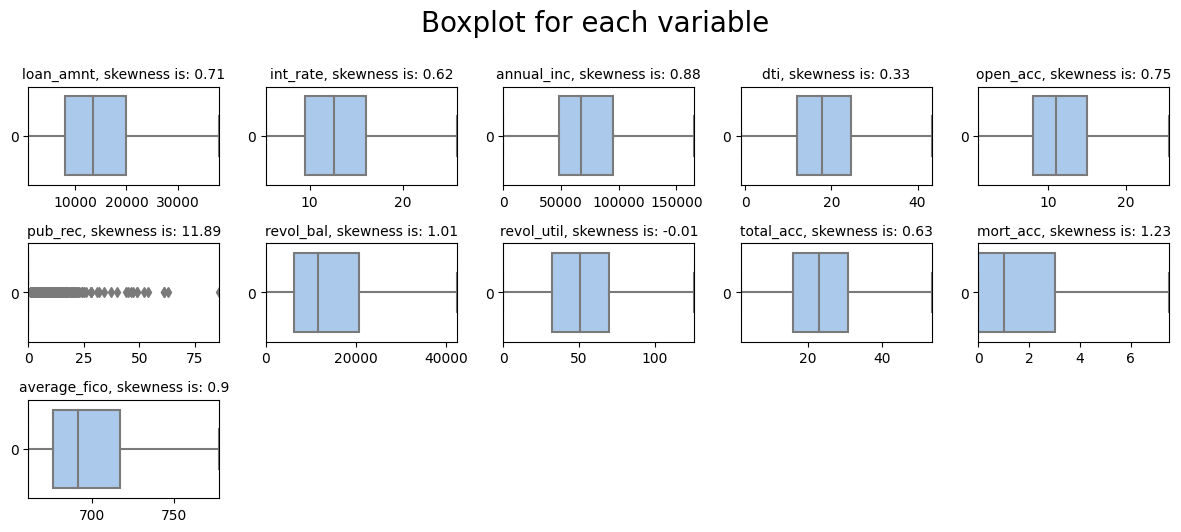

In [93]:
categorical=[feature for feature in new_df_cap.columns if new_df_cap[feature].dtype=='object']
numerical=[feature for feature in new_df_cap.columns if feature not in categorical]
boxplots_visual(data=new_df_cap, column=numerical)

## One-hot encoding 

In [94]:
# nf = pd.get_dummies(nf, columns=['application_type',
#                                     'addr_state',
#                                     'purpose',
#                                     'verification_status',
#                                     'home_ownership',
#                                     'term'])
new_df_cap = pd.get_dummies(new_df_cap, columns=['application_type',
                                    'addr_state',
                                    'purpose',
                                    'verification_status',
                                    'home_ownership',
                                    'term'])
emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0,  # Treat '< 1 year' as 0 years of employment  
}
# nf['emp_length'] = nf['emp_length'].map(emp_length_mapping)
# nf['sub_grade'] = nf['sub_grade'].map({'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4,
#                                                           'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9,
#                                                           'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14,
#                                                           'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19,
#                                                           'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24,
#                                                           'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29,
#                                                           'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34})
# boolcols = nf.select_dtypes(include=[bool]).columns
# nf[boolcols] = nf[boolcols].astype(int)
# nf.head()
new_df_cap['emp_length'] = new_df_cap['emp_length'].map(emp_length_mapping)
new_df_cap['sub_grade'] = new_df_cap['sub_grade'].map({'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4,
                                                          'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9,
                                                          'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14,
                                                          'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19,
                                                          'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24,
                                                          'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29,
                                                          'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34})
boolcols = new_df_cap.select_dtypes(include=[bool]).columns
new_df_cap[boolcols] = new_df_cap[boolcols].astype(int)
new_df_cap.head()

,loan_amnt,int_rate,sub_grade,emp_length,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,verification_status_Source Verified,verification_status_Verified,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,term_ 36 months,term_ 60 months
0,3600.0,13.99,13,10,55000.0,Fully Paid,5.91,7.0,0.0,2765.0,...,0,0,0,1,0,0,0,0,1,0
1,24700.0,11.99,10,10,65000.0,Fully Paid,16.06,22.0,0.0,21470.0,...,0,0,0,1,0,0,0,0,1,0
2,20000.0,10.78,8,10,63000.0,Fully Paid,10.78,6.0,0.0,7869.0,...,0,0,0,1,0,0,0,0,0,1
3,35000.0,14.85,14,10,110000.0,Current,17.06,13.0,0.0,7802.0,...,1,0,0,1,0,0,0,0,0,1
4,10400.0,22.45,25,3,104433.0,Fully Paid,25.37,12.0,0.0,21929.0,...,1,0,0,1,0,0,0,0,0,1


In [95]:
new_df_cap.loan_status.value_counts()

loan_status
Fully Paid            979419
Current               811980
Charged Off           240673
Late (31-120 days)     19592
In Grace Period         7842
Late (16-30 days)       3897
Default                   35
Name: count, dtype: int64

In [96]:
new_df_cap = new_df_cap[(new_df_cap['loan_status'] == 'Fully Paid') | (new_df_cap['loan_status'] == 'Charged Off')]
print(new_df_cap.loan_status.value_counts())
new_df_cap.shape

loan_status
Fully Paid     979419
Charged Off    240673
Name: count, dtype: int64


(1220092, 92)

In [97]:
new_df_cap.loc[:, 'loan_status'] = new_df_cap['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

In [98]:
cr = new_df_cap.corr().abs()
# cr[cr>0.7].unstack().transpose().sort_values(ascending=False)
# Assuming cr is the correlation matrix
corr_threshold = 0.7

# Find pairs of columns with correlation greater than 0.7
high_corr_pairs = [(new_df_cap.columns[i], new_df_cap.columns[j], cr.iloc[i, j]) for i in range(cr.shape[0]) for j in range(i+1, cr.shape[1]) if abs(cr.iloc[i, j]) > corr_threshold]

# Print the high correlation pairs
for pair in high_corr_pairs:
    print(f"Columns {pair[0]} and {pair[1]} have correlation {pair[2]}")

Columns int_rate and sub_grade have correlation 0.9794629663307757
Columns open_acc and total_acc have correlation 0.7023236371501607
Columns application_type_Individual and application_type_Joint App have correlation 1.0000000000000018
Columns home_ownership_MORTGAGE and home_ownership_RENT have correlation 0.8109538468940248
Columns term_ 36 months and term_ 60 months have correlation 1.0000000000000002


<Axes: >

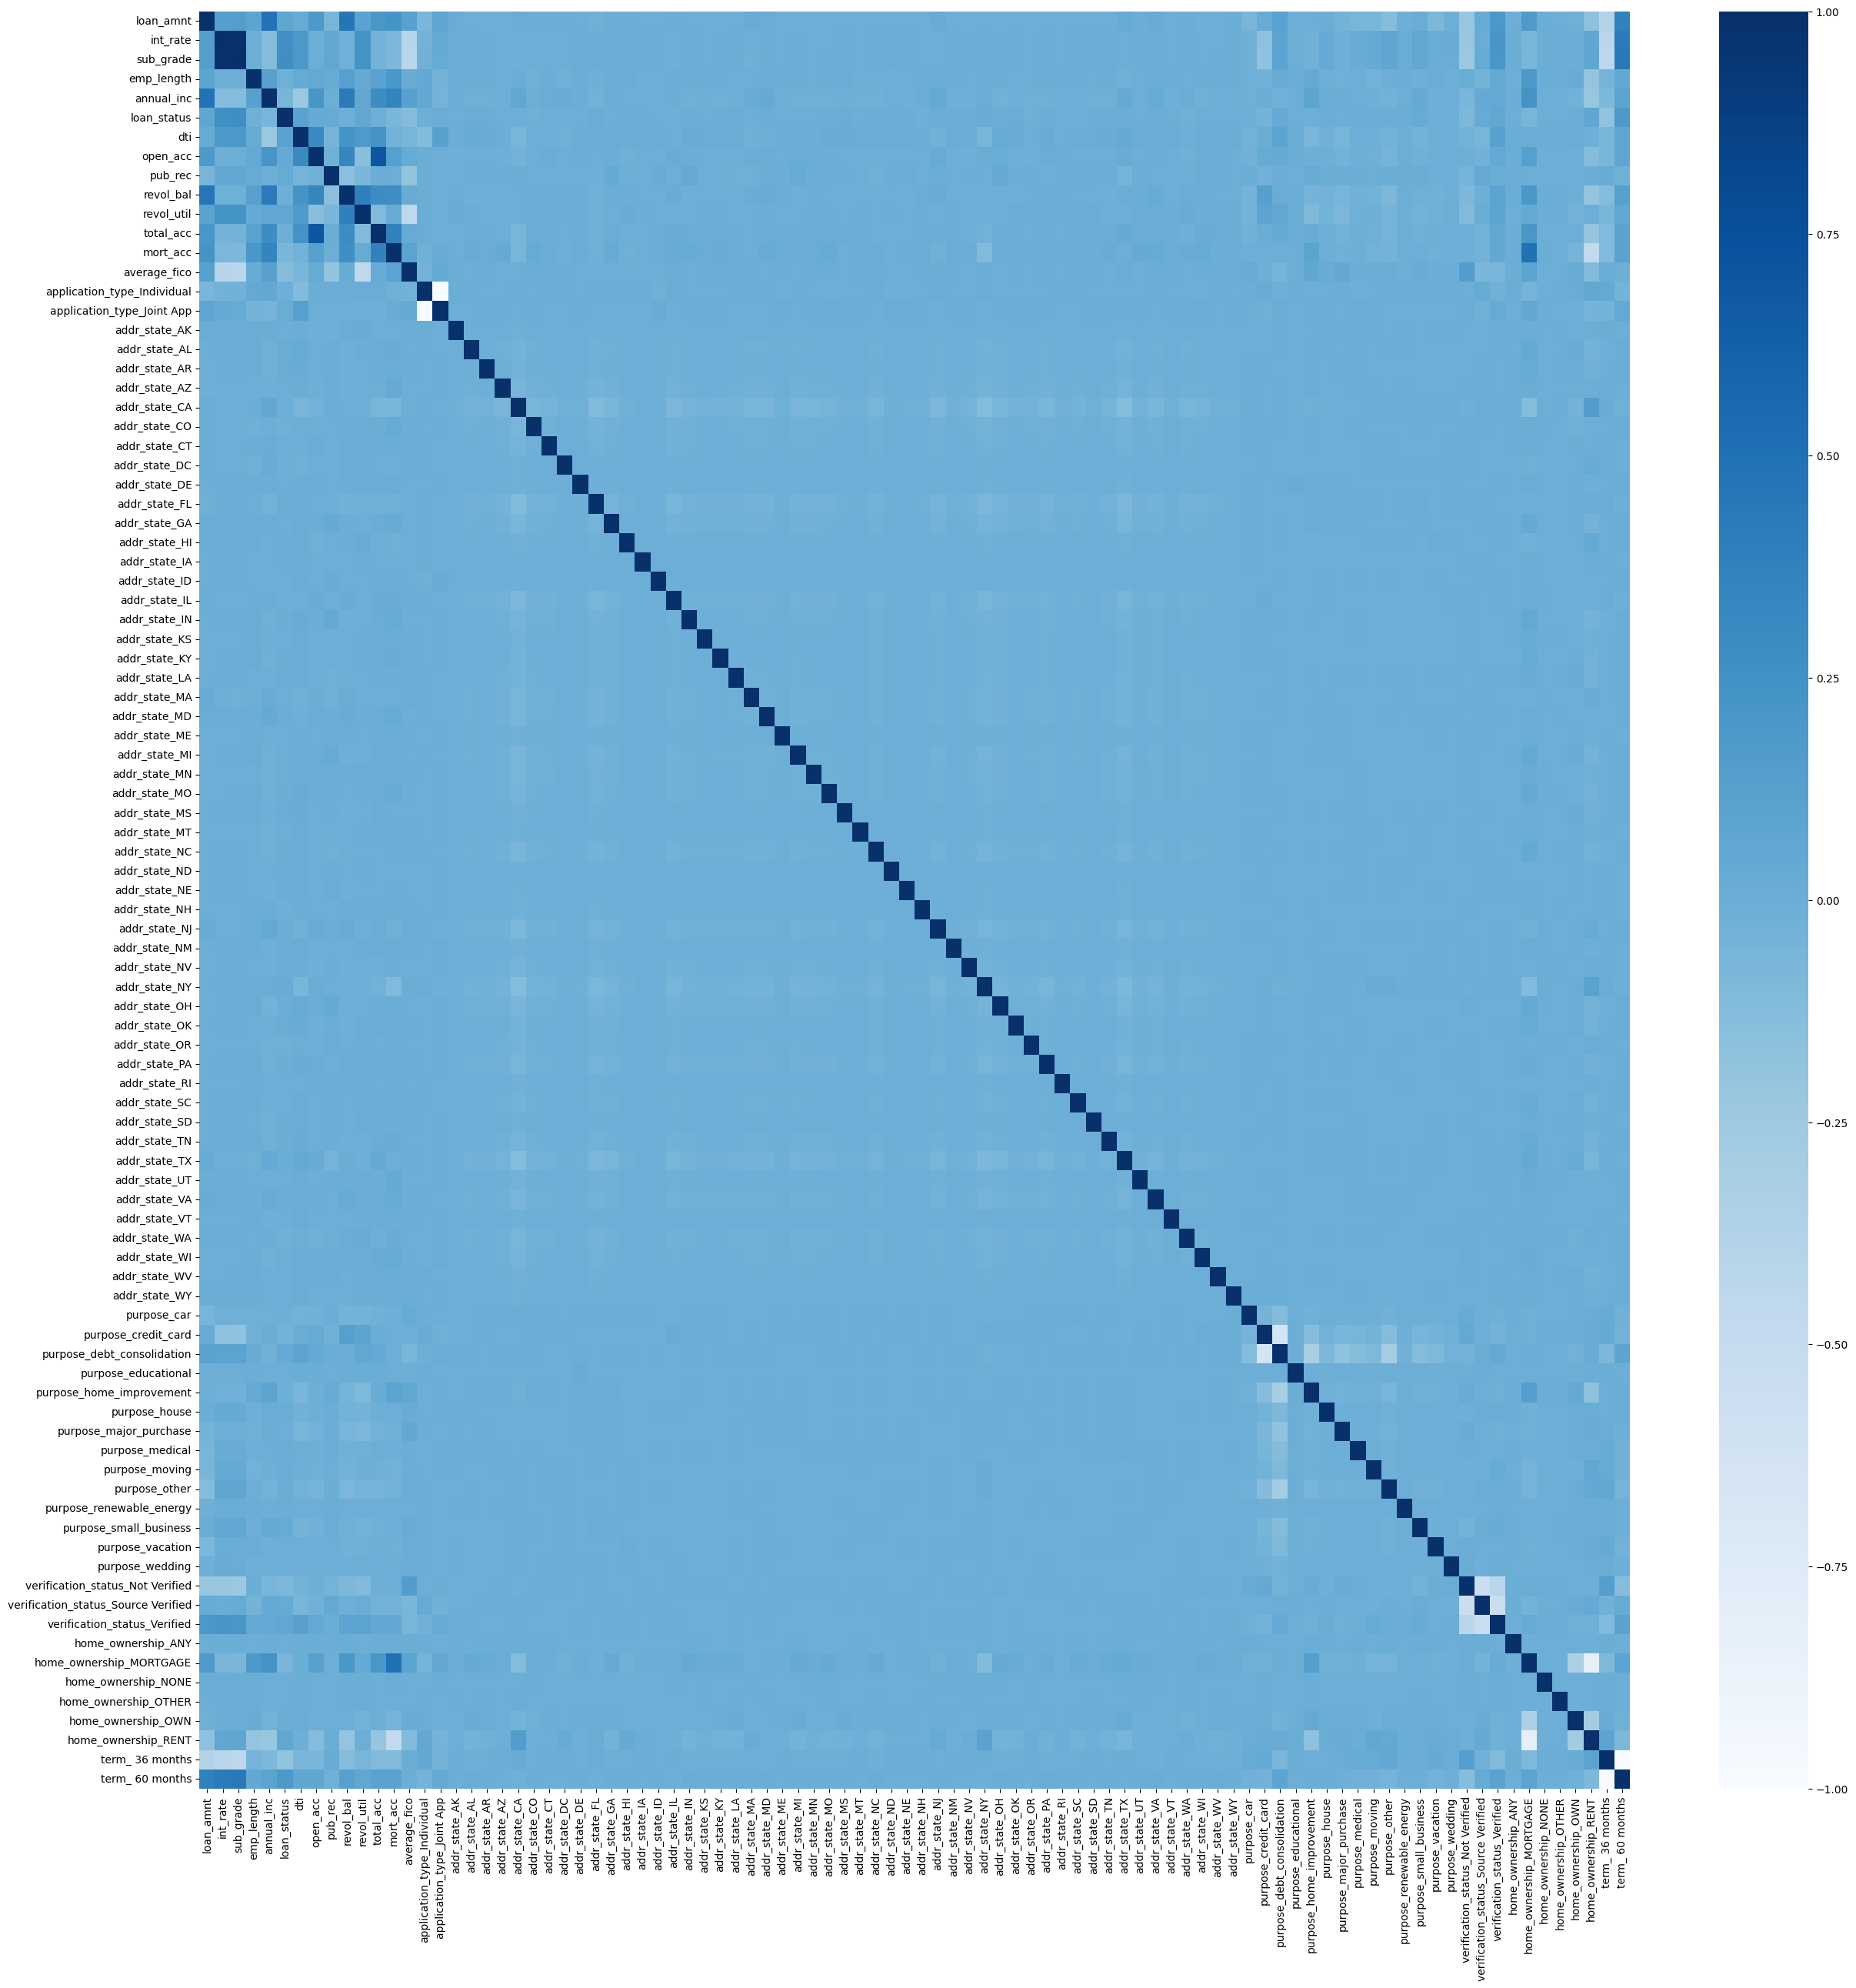

In [99]:
plt.figure(figsize=(30,30))        
sns.heatmap(new_df_cap.corr(), cmap="Blues")

## checking for duplicates

In [100]:
new_df_cap.duplicated().sum() # no duplicates 
new_df_cap.shape

(1220092, 92)

# Model implementation

## Logistic Regression

In [101]:
from sklearn.model_selection import train_test_split
x = new_df_cap.drop(columns=['loan_status'],axis =1).copy()
y = new_df_cap['loan_status']
y = y.astype('int')
y.sample(5)

1829746    0
2229291    0
1814705    0
1147366    1
1101055    1
Name: loan_status, dtype: int64

In [102]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Random Forest

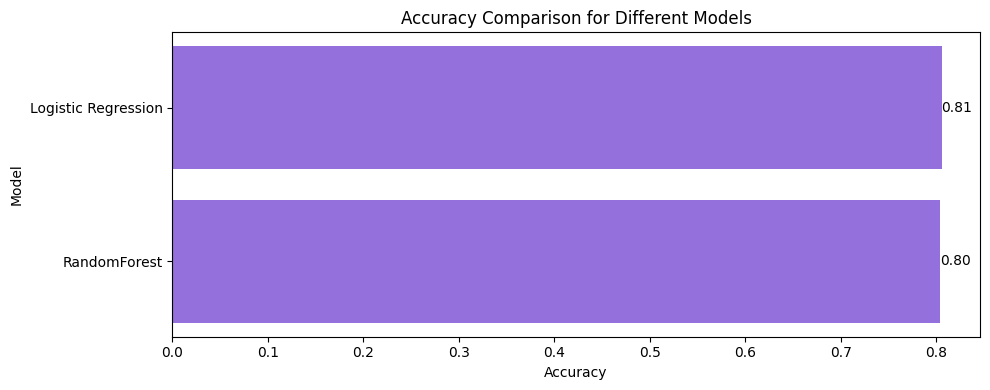

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Define your model names and their corresponding accuracies
model_names = ["RandomForest","Logistic Regression"]
accuracies = [RF_acc,LogR_acc]  # Replace with your actual accuracy values

# Create an array of the same length as the number of models for the y-axis
y = np.arange(len(model_names))

# Create the horizontal accuracy comparison plot with bars on the y-axis
plt.figure(figsize=(10, 4))
plt.barh(y, accuracies, color='#9370DB', height=0.8, alpha=1, align='center')

# Set the labels for the y-axis (model names)
plt.yticks(y, model_names)

# Set labels and title
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Comparison for Different Models')

# Display accuracy values to the right of the bars (optional)
for i, accuracy in enumerate(accuracies):
    plt.text(accuracy, i, f'{accuracy:.2f}', va='center')

# Show the plot
plt.tight_layout()
plt.show()



In [107]:
from sklearn.metrics import confusion_matrix , classification_report 
print("Classification Report for Logistic Regression\n" , classification_report(y_test, y_predict))
print('\n\n')
print("Classification Report for Random Forest\n" , classification_report(y_test, y_pred))

Classification Report for Logistic Regression
               precision    recall  f1-score   support

           0       0.82      0.98      0.89    196102
           1       0.53      0.09      0.16     47917

    accuracy                           0.81    244019
   macro avg       0.67      0.54      0.52    244019
weighted avg       0.76      0.81      0.75    244019




Classification Report for Random Forest
               precision    recall  f1-score   support

           0       0.81      0.98      0.89    196102
           1       0.51      0.09      0.15     47917

    accuracy                           0.80    244019
   macro avg       0.66      0.53      0.52    244019
weighted avg       0.75      0.80      0.74    244019



0-fully charged 
recall = 1 => our model had 0 FN. i.e good customer was not predicted as bad customer
recall = 0 => 

# IMbalance data handling


In [108]:
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (976073, 91)
Number transactions y_train dataset:  (976073,)
Number transactions X_test dataset:  (244019, 91)
Number transactions y_test dataset:  (244019,)


In [109]:
y_train.value_counts()

loan_status
0    783317
1    192756
Name: count, dtype: int64

In [110]:
from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss
sm = SMOTE(sampling_strategy = 'minority')
X_train_over , y_train_over = sm.fit_resample(X_train , y_train)
print("Number transactions X_train dataset: ", X_train_over.shape) 
print("Number transactions y_train dataset: ", y_train_over.shape)
print(y_train_over.value_counts())

Number transactions X_train dataset:  (1566634, 91)
Number transactions y_train dataset:  (1566634,)
loan_status
0    783317
1    783317
Name: count, dtype: int64


In [111]:
from imblearn.under_sampling import NearMiss

In [112]:
nm = NearMiss()
X_train_miss, y_train_miss = nm.fit_resample(X_train, y_train)

KeyboardInterrupt: 

In [68]:
print("Number transactions X_train dataset: ", X_train_miss.shape) 
print("Number transactions y_train dataset: ", y_train_miss.shape)
print(y_train_miss.value_counts())

Number transactions X_train dataset:  (385512, 89)
Number transactions y_train dataset:  (385512,)
loan_status
0    192756
1    192756
Name: count, dtype: int64


In [116]:
model = LogisticRegression()
model.fit(X_train_over , y_train_over)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
y_predict_ov = model.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score
LogR_acc = accuracy_score(y_test, y_predict_ov)
LogR_acc

0.6575799425454575

In [72]:
model = LogisticRegression()
model.fit(X_train_miss , y_train_miss)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
y_predict_un = model.predict(X_test)
LogR_acc = accuracy_score(y_test, y_predict_un)
LogR_acc
print("Classification Report for Logistic Regression\n" , classification_report(y_test, y_predict_ov))

Classification Report for Logistic Regression
               precision    recall  f1-score   support

           0       0.87      0.64      0.74    196102
           1       0.29      0.61      0.39     47917

    accuracy                           0.64    244019
   macro avg       0.58      0.62      0.57    244019
weighted avg       0.76      0.64      0.67    244019



In [74]:
model3 = RandomForestClassifier(n_estimators=30)
model3.fit(X_train_over,y_train_over)

RandomForestClassifier(n_estimators=30)

In [75]:
y_pred_ov = model3.predict(X_test)
RF_acc = accuracy_score(y_test,y_pred_ov)
RF_acc
print("Classification Report for Random Forest\n" , classification_report(y_test, y_pred_ov))

Classification Report for Random Forest
               precision    recall  f1-score   support

           0       0.82      0.97      0.89    196102
           1       0.46      0.11      0.18     47917

    accuracy                           0.80    244019
   macro avg       0.64      0.54      0.53    244019
weighted avg       0.75      0.80      0.75    244019



In [76]:
model5= RandomForestClassifier(n_estimators=50)
model5.fit(X_train_miss,y_train_miss)

RandomForestClassifier(n_estimators=50)

In [77]:
y_pred_un = model5.predict(X_test)
RF_acc = accuracy_score(y_test,y_pred_un)
RF_acc
print("Classification Report for Random Forest\n" , classification_report(y_test, y_pred_un))

Classification Report for Random Forest
               precision    recall  f1-score   support

           0       0.88      0.50      0.64    196102
           1       0.26      0.71      0.38     47917

    accuracy                           0.54    244019
   macro avg       0.57      0.61      0.51    244019
weighted avg       0.76      0.54      0.59    244019

